<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/Analysis_of_Cassandra_Repository_DB%2C_Dataframes%2C_Architectural_Smells_e_RQs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/giselesousar/msr_tests/blob/main/test_cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Process Overview - Identifying source code artifacts that may indicate the presence of ATD

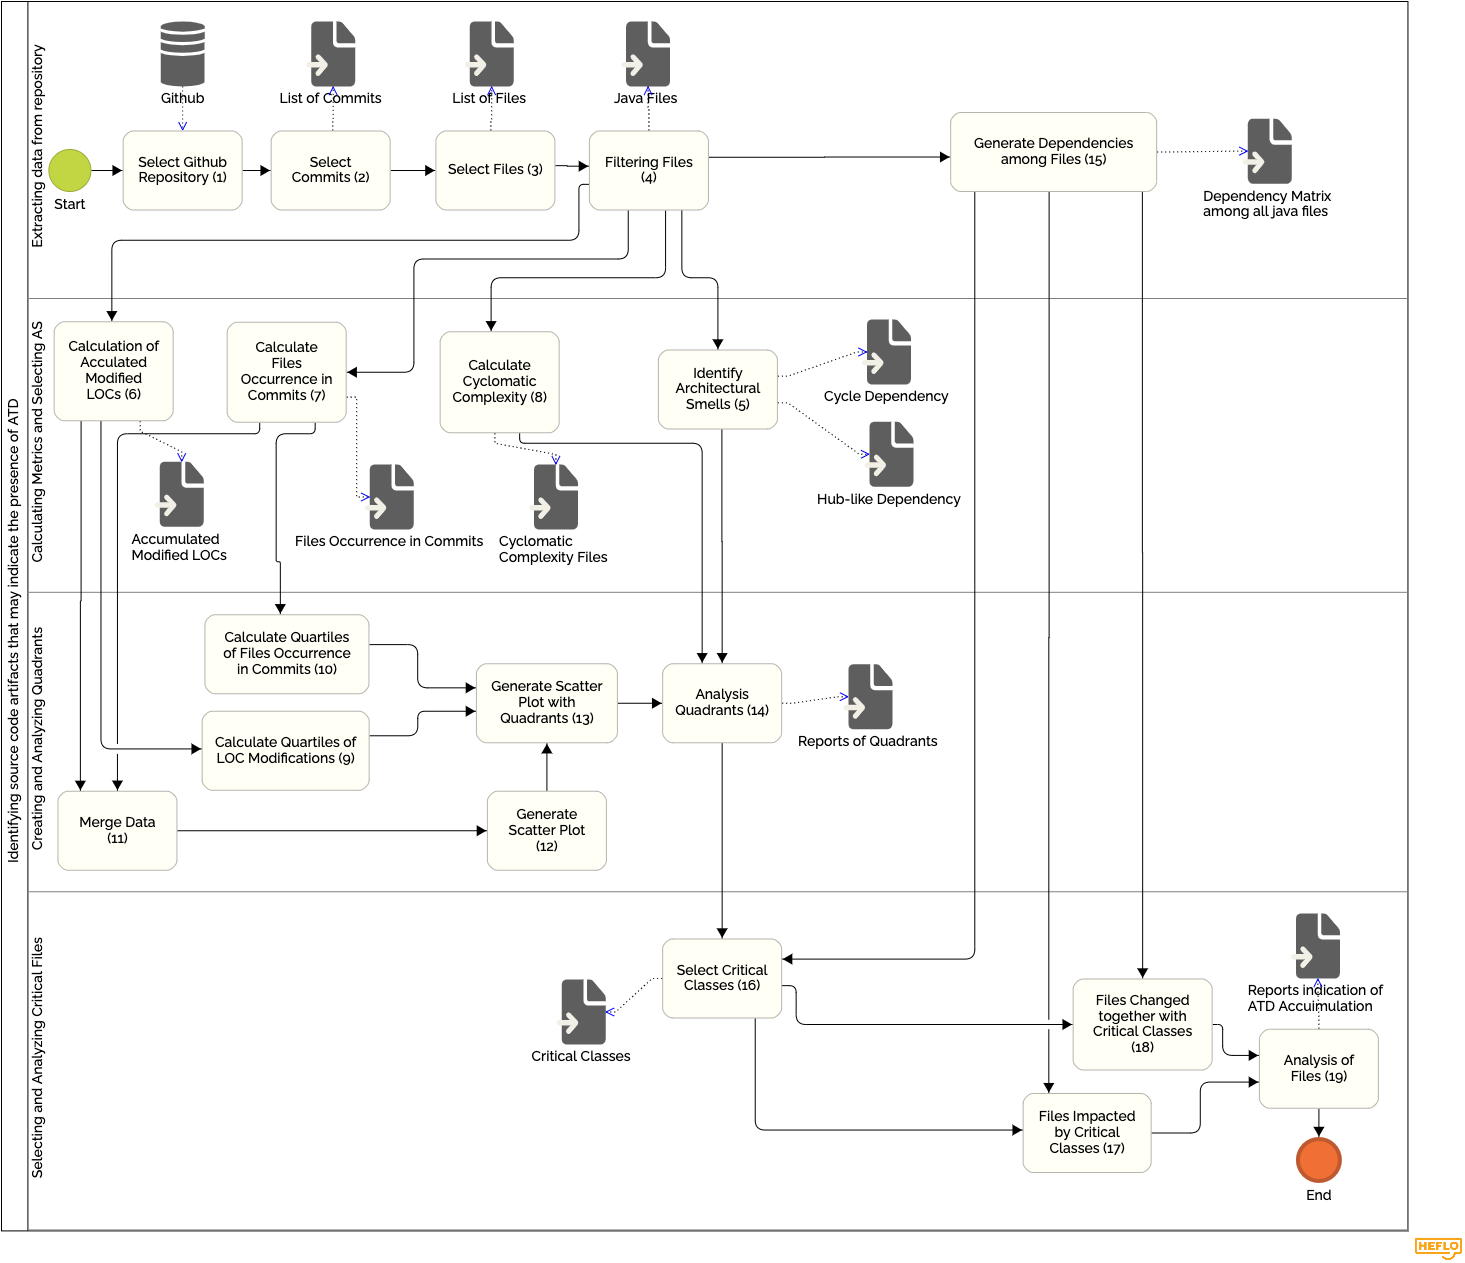

# 1. Load Git Repository (step 1)

In [ ]:
# 1. Clona o repositório Cassandra
!git clone https://github.com/apache/cassandra.git

Cloning into 'cassandra'...
remote: Enumerating objects: 368319, done.
remote: Total 368319 (delta 0), reused 0 (delta 0), pack-reused 368319
Receiving objects: 100% (368319/368319), 370.22 MiB | 10.71 MiB/s, done.
Resolving deltas: 100% (214007/214007), done.


In [ ]:
# 2. Clona o repositorio msr_test para acessar as libs proprietárias
!git clone https://github.com/giselesousar/msr_tests

Cloning into 'msr_tests'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 72 (delta 29), reused 44 (delta 12), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [ ]:
!pip install pydriller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 181 kB 15.7 MB/s 
     |████████████████████████████████| 66 kB 4.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


# 2. Load support scripts

In [ ]:
# 3. Define a faixa de commits que será analisada
# 3.1 Mostra todos os commits entre as tags 3.0.0 e 3.11.11
!cd cassandra && git log --pretty="%H;%ai;%s" cassandra-3.0.0...cassandra-3.11.11 > commits-3.0.0-3.11.11-full.txt
!cd cassandra && git log --pretty="%H %s" cassandra-3.0.0...cassandra-3.11.11 > commits-3.0.0-3.11.11.txt
!echo "10 primeiros commits entre as versões cassandra-3.0.0...cassandra-3.11.11"
!cd cassandra && head commits-3.0.0-3.11.11.txt
!echo "..."

# Total de commits registrados entre as versões cassandra-3.0.0...cassandra-3.11.11
!echo "Total de commits registrados entre as versões cassandra-3.0.0...cassandra-3.11.11: "
!cd cassandra && cat commits-3.0.0-3.11.11.txt | wc -l

10 primeiros commits entre as versões cassandra-3.0.0...cassandra-3.11.11
4cafe2288e56e1135d65e76adbcd6c2de9306d6b Prepare for release 3.11.11
4950878639056261746e24b2a5de29d739668e2d update IDEA setup generation to mark test/conf as test resources
8857d0448914c2b8bb3e4e8f5f49b1d369f53893 Fix broken IntelliJ configuration Authored by Jacek Lewandowski; reviewed by Ekaterina Dimitrova and Michael Semb Wever for CASSANDRA-16618
3e54ed76b29b752f2c17baa98901adf47e5897d1 Don't put apidocs (javadoc) into the binary artifact
7fafda8e9063212168487ae98aad044837b7e2ab Don't fork jvms in the build
b2cfe2e5d7662c4d5900483d1838c718740ea13c Fix warning about multiple versions of ant detected when running ant test patch by Ekaterina Dimitrova; reviewed by Brandon Williams and Mick Semb Wever for CASSANDRA-16571
fd7732389aa77a94d3d5879165e8acde48125d5b Update IDE, Eclipse and NetBeans, classpaths for tests
c44dfab9b5b62820d70aba062ba3c9b9117912db Add JStackJUnitTask to avoid downloading the jar
e69505

In [ ]:
# 3.2 Lista os commits entre duas tags
!cd cassandra && git log --pretty="%H" cassandra-3.0.0...cassandra-3.11.11 > commmitstags300to31111.txt
commits_tag_3_from_000_to_111111 = !cd cassandra && cat commmitstags300to31111.txt
print(f'Qtd: { len(commits_tag_3_from_000_to_111111) }, {commits_tag_3_from_000_to_111111}')

Qtd: 5559, ['4cafe2288e56e1135d65e76adbcd6c2de9306d6b', '4950878639056261746e24b2a5de29d739668e2d', '8857d0448914c2b8bb3e4e8f5f49b1d369f53893', '3e54ed76b29b752f2c17baa98901adf47e5897d1', '7fafda8e9063212168487ae98aad044837b7e2ab', 'b2cfe2e5d7662c4d5900483d1838c718740ea13c', 'fd7732389aa77a94d3d5879165e8acde48125d5b', 'c44dfab9b5b62820d70aba062ba3c9b9117912db', 'e6950518d15da7c0b5a1bb6304f911c056426df5', '2fdf1d27620fe2bce2a3c5989beab40b05fda1e6', '27de93ebb1285e731570eb8585d66832c79c4289', 'd3e174fa226275e6019847f92f86e6400008cca5', 'e243026c851ceb2d99ad01a4a007fe07910ba537', '6bf9b8b694bcff7c9b05a0a6463ce99bc80043b0', '3d7c824c1bc81998492a23b69947ecd6fae54f53', '3259d6de37ad8ad231d44ccd4ca9c378b987f835', 'e5bc2574a59384dd32133df6dd151e9d5e8f2aed', '1205a9de226c3b77bdb1440818daf5f1f34cf0c9', '85de9a05cbdd01ee905d41e16ae8b1d88bf1c7e7', '92773f8f2d88e6ff8ee7b2d913f56215aecb91aa', 'd3ddb190eed11dda305bcae75b6db9e0b9275459', '87645a9256a96f4c528574f48ccf211c0d75272d', '426253a34085f7f11fc

# 3. Load Database with commits from Apache Cassandra (step 2)

In [ ]:
# 4. Carrega o banco de dados das análises de commis do Cassandra 
# Baixa o arquivo sqlite do banco dos commmits do Cassandra
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FS6Pnxo5OCRyvRBJrUL0tc0AxImGUpXM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FS6Pnxo5OCRyvRBJrUL0tc0AxImGUpXM" -O msrcassandra300to31111.db && rm -rf /tmp/cookies.txt

--2022-07-04 13:24:19--  https://docs.google.com/uc?export=download&confirm=t&id=1FS6Pnxo5OCRyvRBJrUL0tc0AxImGUpXM
Resolving docs.google.com (docs.google.com)... 74.125.20.139, 74.125.20.102, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9isa1sse7sugr0cfpkbcdimvl0t7g6a7/1656941025000/13935452558485945860/*/1FS6Pnxo5OCRyvRBJrUL0tc0AxImGUpXM?e=download&uuid=c0e9d5fb-864a-4c0b-a4bb-249ae18abd83 [following]
--2022-07-04 13:24:19--  https://doc-0s-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9isa1sse7sugr0cfpkbcdimvl0t7g6a7/1656941025000/13935452558485945860/*/1FS6Pnxo5OCRyvRBJrUL0tc0AxImGUpXM?e=download&uuid=c0e9d5fb-864a-4c0b-a4bb-249ae18abd83
Resolving doc-0s-04-docs.googleusercontent.com (doc-0s-04-docs.googleusercontent.com)... 173.194.203.132, 260

In [ ]:
import msr_tests.utils.dao as dao
import msr_tests.utils.utility as utility
import datetime
from pydriller import Repository

path_repository = 'cassandra'

def load_db(path_repository, create=False):
    ## 1. Carrega o banco de dados e cria as estruturas das tabelas
    print(f'Configura e carrega o banco {dao.data_base}...')
    db_session = dao.create_session()
    print(f'Banco {dao.data_base} carregado com sucesso! \n')

    # 2. Carrega os manipuladores de CommitComplete e FileComplete
    commitsCompleteCollection = dao.CommitsCompleteCollection(session=db_session)
    filesCompleteCollection = dao.FilesCompleteCollection(session = db_session)

    if create: 
        dao.drop_tables()
        dao.create_tables()

        # 3. É preciso percorrer todos os commits, seus arquivos modificados e salva-los no Banco
        print('Percorrendo todos os commits da lista commits_tag_3_from_000_to_111111...')
        t1 = datetime.datetime.now()
        print(t1)

        for commit in Repository(path_repository, only_commits=commits_tag_3_from_000_to_111111).traverse_commits():    
            c = dao.CommitComplete(name = commit.hash, 
                hash = commit.hash, 
                msg = commit.msg,
                author = utility.concat_str(commit.author.name,commit.author.email), 
                committer = utility.concat_str(commit.committer.name,commit.committer.email), 
                author_date = commit.author_date,
                author_timezone = commit.author_timezone,
                committer_date = commit.committer_date,
                committer_timezone = commit.committer_timezone,
                branches = utility.convert_list_to_str(commit.branches),
                in_main_branch = commit.in_main_branch,
                merge = commit.merge,
                modified_files = utility.convert_modifield_list_to_str(commit.modified_files),
                parents = utility.convert_list_to_str(commit.parents),
                project_name = commit.project_name,
                project_path = commit.project_path,
                deletions = commit.deletions,
                insertions = commit.insertions,
                lines = commit.lines,
                files = commit.files,
                dmm_unit_size = commit.dmm_unit_size,
                dmm_unit_complexity = commit.dmm_unit_complexity,
                dmm_unit_interfacing = commit.dmm_unit_interfacing)
            
            commitsCompleteCollection.insert_commit(c)

            for m in commit.modified_files:
                commit_by_hash = commitsCompleteCollection.query_commit_by_hash(commit.hash)
                if m is not None and  m.filename is not None:
                    if '.java' in m.filename:
                        is_java = True
                    else:
                        is_java = False
                    mf = dao.FileComplete(
                        name = m.filename,
                        hash = commit.hash,
                        is_java = is_java,
                        old_path = m.old_path,
                        new_path = m.new_path,
                        filename = m.filename,
                        change_type = m.change_type.name,
                        diff = str(m.diff),
                        diff_parsed = utility.convert_dictionary_to_str(m.diff_parsed),
                        added_lines = m.added_lines,
                        deleted_lines = m.deleted_lines,
                        source_code = str(m.source_code),
                        source_code_before = str(m.source_code_before),
                        methods = utility.convert_list_to_str(m.methods),
                        methods_before = utility.convert_list_to_str(m.methods_before),
                        changed_methods = utility.convert_list_to_str(m.changed_methods),
                        nloc = m.nloc,
                        complexity = m.complexity,
                        token_count = m.token_count, 
                        commit_id = commit_by_hash.id
                    )
                    # salva o arquivo correte
                    filesCompleteCollection.insert_file(mf)

        t2 = datetime.datetime.now()
        print(t2)
        print(f'Analise concluida em: {t2 -t1}')

    return filesCompleteCollection, commitsCompleteCollection

In [ ]:
# 4.1. Carrega os manipuladores do banco de dados do Cassandra 
# Obs: o parâmetro create deve ser setado para True caso deseje recriar o banco do zero.
filesCompleteCollection, commitsCompleteCollection = load_db(path_repository, create=False)

Configura e carrega o banco msrcassandra300to31111.db...
Banco msrcassandra300to31111.db carregado com sucesso! 



# 4. Load tables from DB to Dataframes. (steps 3, 4)

In [ ]:
# 4.2 Carrega as tabelas do banco em dataframes

import pandas as pd
import sqlite3

DATA_BASE='msrcassandra300to31111.db'
con = sqlite3.connect(DATA_BASE)

my_query_commits = "select * from commitscomplete"
my_query_files = "select * from filescomplete"
my_query_files_commits = "select f.id as 'file_id', f.hash as 'file_hash_commit', f.description as 'file_description', f.is_java as 'file_is_java', f.created_date as 'file_created_date', f.old_path as 'file_old_path', f.new_path as 'file_new_path', f.filename as 'file_filename', f.change_type as 'file_change_type', f.diff as 'file_diff', f.diff_parsed as 'file_diff_parsed', f.added_lines as 'file_added_lines', f.deleted_lines as 'file_deleted_lines', f.source_code as 'file_source_code', f.source_code_before as 'file_source_code_before', f.nloc as 'file_nloc', f.complexity as 'file_complexity', f.token_count as 'file_token_count', f.commit_id as 'file_commit_id', c.* from filescomplete f, commitscomplete c where f.commit_id=c.id"

df_commits_from_db = pd.read_sql_query(my_query_commits, con)
df_files_from_db = pd.read_sql_query(my_query_files, con)
df_files_commits_from_db = pd.read_sql(my_query_files_commits, con)

con.close() 

In [ ]:
# Faz alguns ajustes nos dataframes
df_files_from_db['modified_lines'] = df_files_from_db.added_lines + df_files_from_db.deleted_lines


In [ ]:
df_files_commits_from_db['modified_lines'] = df_files_commits_from_db.file_added_lines + df_files_commits_from_db.file_deleted_lines

In [ ]:
# Lista os commits e seus arquivos modificados
df_commits_from_db[['name', 'modified_files']].head(10)

,name,modified_files
0,a37f8becf2d5df2895febbd8ec0cbd8ba793be8f,
1,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,"Config.java,DatabaseDescriptor.java,Transparen..."
2,9acf58801382cf1d3b4223c6191d729b58440564,
3,7d2a96ef67d11dae743a55954712965a7a6ae6a2,
4,becee6ae4a04f76d5998de1814c9d6e0164d998d,
5,55a9b1b7fb17f176201b2990346f871d968598aa,
6,630220a2a303a391ad7ce4e74541d1029e1f968f,
7,3ab86d0431e24faee96acabddbae63d03d4de274,
8,de49ed84cf5fdd21e3215940b6b375ae77cc1774,
9,760dbd957c3c2cc69ea7d74a954891bbe3a156b4,


In [ ]:
# procura por um commit especifico
df_commits_from_db[['name', 'modified_files']].query("name == '47341eb6aaca318d0ffc0e9f906b98db50b9e9ff'")

,name,modified_files
1,47341eb6aaca318d0ffc0e9f906b98db50b9e9ff,"Config.java,DatabaseDescriptor.java,Transparen..."


In [ ]:
# Lista todos os arquivos e seus commits
df_files_from_db[['name', 'hash']].sort_values('name').head(10)

,name,hash
11641,.gitignore,ad16aa17637b144d114ffc8022aa24b4e98d6a21
4449,.gitignore,0e624238c15558155a57bcfa7ada9b3b84067658
11606,.gitignore,53b0661cbbe705901d7a891c9c6ba34a42f07427
3916,.gitignore,89f275c6587150907b90ed03ca515b12c0c6ae11
12106,.gitignore,2fdf1d27620fe2bce2a3c5989beab40b05fda1e6
4346,.gitignore,54f7335cd9bcf13f96d62191b64ea179a61c1763
10905,.gitignore,334024751c4dd2726ff244f691687647a0e94c5f
11979,.gitignore,3259d6de37ad8ad231d44ccd4ca9c378b987f835
11607,.rat-excludes,53b0661cbbe705901d7a891c9c6ba34a42f07427
1151,002cassandra_logdir_fix.dpatch,3e45fa1ab521bd50eb247f58daa2bfa76c6ab4e5


In [ ]:
# Mostra as Complexidades Ciclomáticas dos arquivos
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)

,file_filename,file_complexity,author_date
3916,.gitignore,NaN,2016-05-15 22:40:38.000000
4346,.gitignore,NaN,2016-06-21 19:52:52.000000
4449,.gitignore,NaN,2016-06-24 17:01:37.000000
10905,.gitignore,NaN,2020-06-03 15:41:33.000000
11979,.gitignore,NaN,2021-03-29 00:51:11.000000
...,...,...,...
10140,workspace.xml,NaN,2019-03-21 13:01:49.000000
10585,workspace.xml,NaN,2020-01-10 10:34:27.000000
11873,workspace.xml,NaN,2021-06-15 14:07:39.000000
9396,world_cities_a.csv,NaN,2018-02-21 21:16:05.000000


In [ ]:
# Mostra as complexidades ciclomáticas de um determinado arquivo
df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True).query("file_filename == 'StorageService.java'")

,file_filename,file_complexity,author_date
1122,StorageService.java,737.0,2015-08-03 10:12:47.000000
734,StorageService.java,727.0,2015-10-08 12:13:28.000000
297,StorageService.java,719.0,2015-10-29 12:36:32.000000
302,StorageService.java,705.0,2015-11-10 13:08:05.000000
257,StorageService.java,718.0,2015-11-10 17:22:11.000000
...,...,...,...
11594,StorageService.java,909.0,2021-04-09 16:19:17.000000
11636,StorageService.java,909.0,2021-04-14 13:49:21.000000
11673,StorageService.java,836.0,2021-04-21 13:59:57.000000
11648,StorageService.java,836.0,2021-04-23 15:07:43.000000


In [ ]:
df_commits_from_db.to_csv('commits.csv') 
df_files_from_db.to_csv('files.csv') 
df_files_commits_from_db.to_csv('files_commits.csv') 

In [ ]:
!ls -lth

total 4.7G
-rw-r--r--  1 root root 1.6G Jul  4 13:26 files_commits.csv
-rw-r--r--  1 root root 1.6G Jul  4 13:25 files.csv
-rw-r--r--  1 root root 2.6M Jul  4 13:25 commits.csv
-rw-r--r--  1 root root 1.6G Jul  4 13:24 msrcassandra300to31111.db
drwxr-xr-x 18 root root 4.0K Jul  4 13:23 cassandra
drwxr-xr-x  5 root root 4.0K Jul  4 13:23 msr_tests
drwxr-xr-x  1 root root 4.0K Jun 29 13:44 sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 5. Calculate the variables used in Case Study (steps 6, 7, 8, 9, 10)

a) Accumulated Modified LOC

b) Cyclomatic Complexity

c) File Occurrency in Commits

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 5.1 Group by Total Modified Rows

In [ ]:
df_files_from_db[['name','modified_lines']]

,name,modified_lines
0,Config.java,3
1,DatabaseDescriptor.java,18
2,TransparentDataEncryptionOptions.java,76
3,CipherFactory.java,175
4,EncryptionContext.java,122
...,...,...
12249,CHANGES.txt,1
12250,build.xml,14
12251,idea-iml-file.xml,18
12252,idea-iml-file.xml,1


In [ ]:
# Lista arquivos ordenados por nome com suas linhas modificadas
df_files_from_db[['name','modified_lines']].sort_values(by=['name'], ascending=True).head(10)

,name,modified_lines
11641,.gitignore,3
4449,.gitignore,2
11606,.gitignore,9
3916,.gitignore,1
12106,.gitignore,13
4346,.gitignore,3
10905,.gitignore,1
11979,.gitignore,3
11607,.rat-excludes,34
1151,002cassandra_logdir_fix.dpatch,15


In [ ]:
# Agrupa o df por nome do arquivo
df_groupby_name_modified_lines = df_files_from_db[['name','modified_lines']].groupby('name')

# Soma o total de linhas modificadas de cada arquivo
group_files_modified_lines = df_groupby_name_modified_lines.sum()
group_files_modified_lines

,modified_lines
name,
.gitignore,35
.rat-excludes,34
002cassandra_logdir_fix.dpatch,67
AbstractAllocator.java,1
AbstractAnalyzer.java,67
...,...
wcwidth.py,85
winpty.py,50
workspace.xml,378


In [ ]:
# Cria um novo df de Linhas de Código Modificadas
df_locm = group_files_modified_lines.copy()
df_locm = df_locm.reset_index()
df_locm

,name,modified_lines
0,.gitignore,35
1,.rat-excludes,34
2,002cassandra_logdir_fix.dpatch,67
3,AbstractAllocator.java,1
4,AbstractAnalyzer.java,67
...,...,...
2638,wcwidth.py,85
2639,winpty.py,50
2640,workspace.xml,378
2641,world_cities_a.csv,1


### 5.1.1 All files

In [ ]:
# Acrescenta uma coluna File
df_locm['File'] = 'File'
df_boxplot_em = df_locm[['modified_lines', 'File']]

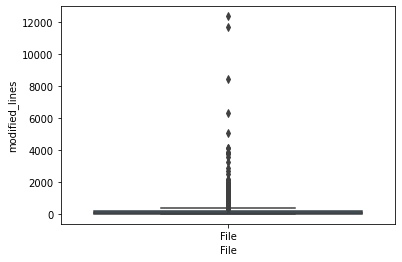

In [ ]:
# Boxplot do EM (Esforço de Manutenção de Locs Modificadas). Todos os arquivos do repositório
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em)

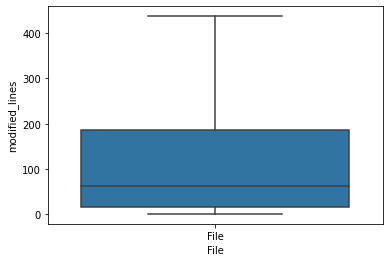

In [ ]:
# Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
df_boxplot_em = df_boxplot_em.drop(df_boxplot_em[df_boxplot_em.modified_lines == 0].index)

plt.figure(figsize=(6,4))
# Constroi o Boxsplot sem os outliers
sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em,  showfliers=False)

In [ ]:
list_of_files_modified_lines = group_files_modified_lines.to_dict()
print(f'{ len(list_of_files_modified_lines) }, {list_of_files_modified_lines}')

1, {'modified_lines': {'.gitignore': 35, '.rat-excludes': 34, '002cassandra_logdir_fix.dpatch': 67, 'AbstractAllocator.java': 1, 'AbstractAnalyzer.java': 67, 'AbstractBTreePartition.java': 132, 'AbstractBufferClusteringPrefix.java': 72, 'AbstractCType.java': 6, 'AbstractCell.java': 170, 'AbstractCluster.java': 1764, 'AbstractClusteringPrefix.java': 44, 'AbstractColumnFamilyInputFormat.java': 116, 'AbstractCommitLogSegmentManager.java': 672, 'AbstractCommitLogService.java': 576, 'AbstractCommitLogServiceTest.java': 225, 'AbstractCompactionStrategy.java': 165, 'AbstractCompactionStrategyTest.java': 144, 'AbstractCompactionTask.java': 7, 'AbstractCompositeType.java': 18, 'AbstractCompositeTypeTest.java': 35, 'AbstractConditions.java': 5, 'AbstractFunction.java': 17, 'AbstractFunctionSelector.java': 41, 'AbstractIterator.java': 155, 'AbstractJmxClient.java': 10, 'AbstractLocalAwareExecutorService.java': 86, 'AbstractMarker.java': 48, 'AbstractModification.java': 4, 'AbstractNativeCell.java

In [ ]:
# Mostra os quatis 
em_q1 = np.percentile(df_boxplot_em.modified_lines, [25])
em_q2 = np.percentile(df_boxplot_em.modified_lines, [50])
em_q3 = np.percentile(df_boxplot_em.modified_lines, [75])
em_q4 = np.percentile(df_boxplot_em.modified_lines, [100])

print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1}, Q2: {em_q2}, Q3: {em_q3}, Q4: {em_q4}')

Quartis do Total de Linhas Modificadas: Q1: [17.], Q2: [63.], Q3: [185.], Q4: [12361.]


### 5.1.2 Only .java files

In [ ]:
# Cria um df sem os arquivos de Teste
df_locm_no_test = df_locm[(df_locm["name"].str.contains('Test') == False)]

# Cria um df contendo apenas os arquivos .java de implementacao
df_locm_java_impl = df_locm_no_test[df_locm_no_test['name'].str.contains('.java', regex=False)]
df_locm_java_impl

,name,modified_lines,File
3,AbstractAllocator.java,1,File
4,AbstractAnalyzer.java,67,File
5,AbstractBTreePartition.java,132,File
6,AbstractBufferClusteringPrefix.java,72,File
7,AbstractCType.java,6,File
...,...,...,...
1965,WriteResponseHandler.java,13,File
1966,WriteType.java,3,File
1967,WritetimeOrTTLSelector.java,8,File
1968,YamlConfigurationLoader.java,222,File


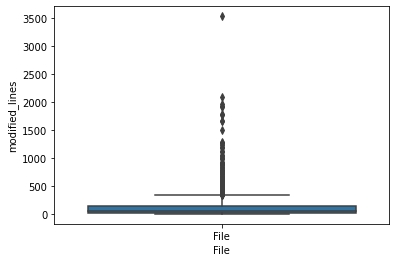

In [ ]:
df_boxplot_em_java_impl = df_locm_java_impl[['modified_lines', 'File']]

plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl)

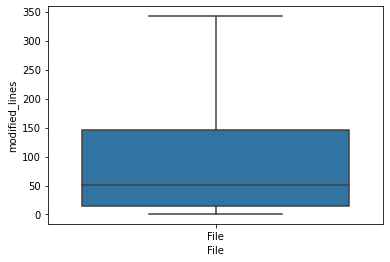

In [ ]:
# Remove os arquivos que não foram modificados ao longo do tempo (O linhas modificadas)
df_boxplot_em_java_impl = df_boxplot_em_java_impl.drop(df_boxplot_em_java_impl[df_boxplot_em_java_impl.modified_lines == 0].index)

plt.figure(figsize=(6,4))
# Constroi o Boxsplot sem os outliers
sns.boxplot(x='File', y='modified_lines', data=df_boxplot_em_java_impl,  showfliers=False)

In [ ]:
# Mostra os quatis 
em_q1_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [25])
em_q2_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [50])
em_q3_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [75])
em_q4_java_impl = np.percentile(df_boxplot_em_java_impl.modified_lines, [100])

print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_java_impl}, Q2: {em_q2_java_impl}, Q3: {em_q3_java_impl}, Q4: {em_q4_java_impl}')

Quartis do Total de Linhas Modificadas: Q1: [14.], Q2: [51.5], Q3: [145.25], Q4: [3537.]


## 5.2 Cyclomatic Complexity over time

In [ ]:
# Mostra as Complexidades Ciclomáticas dos arquivos ordenada crescent pelo tempo
df_cc = df_files_commits_from_db[['file_filename', 'file_complexity', 'author_date']].sort_values(by=['file_filename', 'author_date'], ascending=True)
df_cc.query("file_filename == 'StorageService.java'")

,file_filename,file_complexity,author_date
1122,StorageService.java,737.0,2015-08-03 10:12:47.000000
734,StorageService.java,727.0,2015-10-08 12:13:28.000000
297,StorageService.java,719.0,2015-10-29 12:36:32.000000
302,StorageService.java,705.0,2015-11-10 13:08:05.000000
257,StorageService.java,718.0,2015-11-10 17:22:11.000000
...,...,...,...
11594,StorageService.java,909.0,2021-04-09 16:19:17.000000
11636,StorageService.java,909.0,2021-04-14 13:49:21.000000
11673,StorageService.java,836.0,2021-04-21 13:59:57.000000
11648,StorageService.java,836.0,2021-04-23 15:07:43.000000


### 5.2.1 All files

In [ ]:
# Remove files that has not cc
# cc all files
df_cc_temp = df_cc.copy()
df_cc_temp = df_cc_temp[df_cc_temp.file_complexity.notnull()]

Quartis do Total de Linhas Modificadas: Q1: [14.], Q2: [36.], Q3: [86.], Q4: [909.]


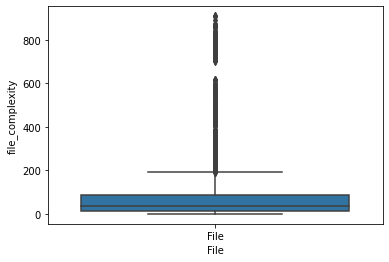

In [ ]:
##### Todos os arquivos #####
# Acrescenta uma coluna File
df_cc_temp['File'] = 'File'
df_boxplot_cc_temp = df_cc_temp[['file_complexity', 'File']]

# Boxplot do CC. Todos os arquivos do repositório
plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='file_complexity', data=df_boxplot_cc_temp)

# Mostra os quatis 
em_q1_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [25])
em_q2_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [50])
em_q3_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [75])
em_q4_cc_temp = np.percentile(df_boxplot_cc_temp.file_complexity, [100])

print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp}, Q2: {em_q2_cc_temp}, Q3: {em_q3_cc_temp}, Q4: {em_q4_cc_temp}')

### 5.2.2 Only .java files

Quartis do Total de Linhas Modificadas: Q1: [15.], Q2: [42.], Q3: [96.], Q4: [909.]


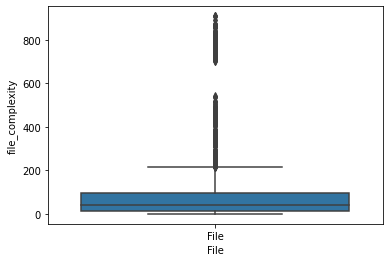

In [ ]:
### Apenas os arquivos .java ###
# Cria um df sem os arquivos de Teste
df_cc_temp_no_test = df_cc_temp[(df_cc_temp["file_filename"].str.contains('Test') == False)]

# Cria um df contendo apenas os arquivos .java de implementacao
df_cc_temp_java_impl = df_cc_temp_no_test[df_cc_temp_no_test['file_filename'].str.contains('.java', regex=False)]

df_cc_temp_boxplot_em_java_impl = df_cc_temp_java_impl[['file_complexity', 'File']]

plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='file_complexity', data=df_cc_temp_boxplot_em_java_impl)

# Mostra os quatis 
em_q1_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [25])
em_q2_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [50])
em_q3_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [75])
em_q4_cc_temp_java_impl = np.percentile(df_cc_temp_boxplot_em_java_impl.file_complexity, [100])

print(f'Quartis do Total de Linhas Modificadas: Q1: {em_q1_cc_temp_java_impl}, Q2: {em_q2_cc_temp_java_impl}, Q3: {em_q3_cc_temp_java_impl}, Q4: {em_q4_cc_temp_java_impl}')

## 5.3 File Occurrency in Commits

In [ ]:
# calcula frequência dos arquivos na faixa de commits analisados
list_of_files_frequency_in_commits = {}

# Dataframe agrupados por arquivos e seus commits
df_groupby_name = df_files_from_db[['name', 'hash']].groupby('name')

print(f'Quantidade de grupos: {df_groupby_name.ngroups}')
print(f'Grupos: {df_groupby_name.groups}')

Quantidade de grupos: 2643
Grupos: {'.gitignore': [3916, 4346, 4449, 10905, 11606, 11641, 11979, 12106], '.rat-excludes': [11607], '002cassandra_logdir_fix.dpatch': [1145, 1151, 1235, 10210], 'AbstractAllocator.java': [1698], 'AbstractAnalyzer.java': [1506, 1969, 9563], 'AbstractBTreePartition.java': [28, 1636, 1678, 3389, 5164, 5244, 5457, 8276, 8291, 8662, 10822], 'AbstractBufferClusteringPrefix.java': [1661], 'AbstractCType.java': [1297, 1363], 'AbstractCell.java': [657, 1681, 2988, 2996, 3514, 3517, 3713, 7548, 8634, 10622], 'AbstractCluster.java': [10000, 10077, 10129, 10151, 10190, 10330, 10380, 10471, 10540, 10545, 10641, 10652, 10722, 10773, 10897, 10961, 11156, 11181, 11193, 11203, 11276, 11338, 11388, 11455, 11489], 'AbstractClusteringPrefix.java': [1662], 'AbstractColumnFamilyInputFormat.java': [204, 213, 490, 724], 'AbstractCommitLogSegmentManager.java': [4204, 4471, 5174, 6393, 7897, 8570, 9442, 11163, 11366], 'AbstractCommitLogService.java': [2477, 2483, 4205, 5175, 7661,

In [ ]:
df_files_from_db[['name', 'hash']].query("name=='.gitignore'")

,name,hash
3916,.gitignore,89f275c6587150907b90ed03ca515b12c0c6ae11
4346,.gitignore,54f7335cd9bcf13f96d62191b64ea179a61c1763
4449,.gitignore,0e624238c15558155a57bcfa7ada9b3b84067658
10905,.gitignore,334024751c4dd2726ff244f691687647a0e94c5f
11606,.gitignore,53b0661cbbe705901d7a891c9c6ba34a42f07427
11641,.gitignore,ad16aa17637b144d114ffc8022aa24b4e98d6a21
11979,.gitignore,3259d6de37ad8ad231d44ccd4ca9c378b987f835
12106,.gitignore,2fdf1d27620fe2bce2a3c5989beab40b05fda1e6


In [ ]:
group_files = df_groupby_name.size()
print(group_files)
print('')
list_of_files_frequency_in_commits = group_files.to_dict()
print(f'{ len(list_of_files_frequency_in_commits) }, {list_of_files_frequency_in_commits}')

name
.gitignore                        8
.rat-excludes                     1
002cassandra_logdir_fix.dpatch    4
AbstractAllocator.java            1
AbstractAnalyzer.java             3
                                 ..
wcwidth.py                        4
winpty.py                         1
workspace.xml                     7
world_cities_a.csv                1
zn_tw_1.txt                       1
Length: 2643, dtype: int64

2643, {'.gitignore': 8, '.rat-excludes': 1, '002cassandra_logdir_fix.dpatch': 4, 'AbstractAllocator.java': 1, 'AbstractAnalyzer.java': 3, 'AbstractBTreePartition.java': 11, 'AbstractBufferClusteringPrefix.java': 1, 'AbstractCType.java': 2, 'AbstractCell.java': 10, 'AbstractCluster.java': 25, 'AbstractClusteringPrefix.java': 1, 'AbstractColumnFamilyInputFormat.java': 4, 'AbstractCommitLogSegmentManager.java': 9, 'AbstractCommitLogService.java': 11, 'AbstractCommitLogServiceTest.java': 2, 'AbstractCompactionStrategy.java': 19, 'AbstractCompactionStrategyTest.java': 1

In [ ]:
# Cria um df contendo o arquivo e sua frequencia de commits
df_fc = pd.DataFrame({'name':group_files.index, 'frequency_commits': group_files.values})
df_fc

,name,frequency_commits
0,.gitignore,8
1,.rat-excludes,1
2,002cassandra_logdir_fix.dpatch,4
3,AbstractAllocator.java,1
4,AbstractAnalyzer.java,3
...,...,...
2638,wcwidth.py,4
2639,winpty.py,1
2640,workspace.xml,7
2641,world_cities_a.csv,1


### 5.3.1 All files

In [ ]:
df_boxplot_fc = df_fc
# Acrescenta a coluna File
df_boxplot_fc['File'] = 'File'
df_boxplot_fc

,name,frequency_commits,File
0,.gitignore,8,File
1,.rat-excludes,1,File
2,002cassandra_logdir_fix.dpatch,4,File
3,AbstractAllocator.java,1,File
4,AbstractAnalyzer.java,3,File
...,...,...,...
2638,wcwidth.py,4,File
2639,winpty.py,1,File
2640,workspace.xml,7,File
2641,world_cities_a.csv,1,File


In [ ]:
# Remove as frequencias muito baixas (total de commits < 10)
df_boxplot_fc = df_boxplot_fc.drop(df_boxplot_fc[df_boxplot_fc.frequency_commits < 10].index)
df_boxplot_fc

,name,frequency_commits,File
5,AbstractBTreePartition.java,11,File
8,AbstractCell.java,10,File
9,AbstractCluster.java,25,File
13,AbstractCommitLogService.java,11,File
15,AbstractCompactionStrategy.java,19,File
...,...,...,...
2118,cqlshrc.sample,12,File
2151,formatting.py,19,File
2178,idea-iml-file.xml,12,File
2179,index.rst,19,File


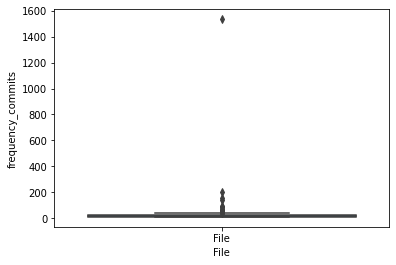

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc)

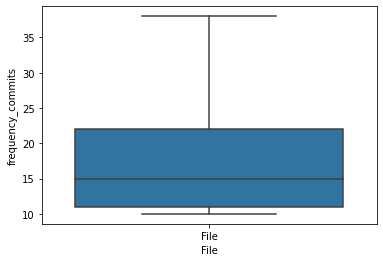

In [ ]:
plt.figure(figsize=(6,4))

# Constroi o Boxsplot sem os outliers
sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc, showfliers=False)

In [ ]:
fc_q1 = np.percentile(df_boxplot_fc.frequency_commits , [25])
fc_q2 = np.percentile(df_boxplot_fc.frequency_commits , [50])
fc_q3 = np.percentile(df_boxplot_fc.frequency_commits , [75])
fc_q4 = np.percentile(df_boxplot_fc.frequency_commits , [100])

print(f'Quartis da Frequencia de Commits Q1: {fc_q1}, Q2: {fc_q2}, Q3: {fc_q3}, Q4: {fc_q4}')

Quartis da Frequencia de Commits Q1: [11.], Q2: [15.], Q3: [22.], Q4: [1534.]


### 5.3.2 Only .java files

In [ ]:
# Cria um df sem os arquivos de Teste
df_fc_no_test = df_fc[(df_fc["name"].str.contains('Test') == False)]

# Cria um df contendo apenas os arquivos .java de implementacao
df_fc_java_impl = df_fc_no_test[df_fc_no_test['name'].str.contains('.java', regex=False)]
df_fc_java_impl

,name,frequency_commits,File
3,AbstractAllocator.java,1,File
4,AbstractAnalyzer.java,3,File
5,AbstractBTreePartition.java,11,File
6,AbstractBufferClusteringPrefix.java,1,File
7,AbstractCType.java,2,File
...,...,...,...
1965,WriteResponseHandler.java,1,File
1966,WriteType.java,1,File
1967,WritetimeOrTTLSelector.java,2,File
1968,YamlConfigurationLoader.java,10,File


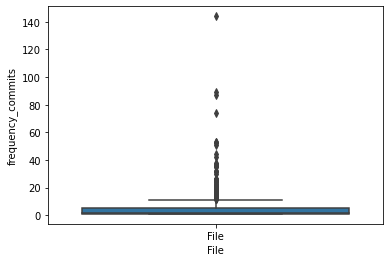

In [ ]:
df_boxplot_fc_java_impl = df_fc_java_impl[['frequency_commits', 'File']]

plt.figure(figsize=(6,4))
sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl)

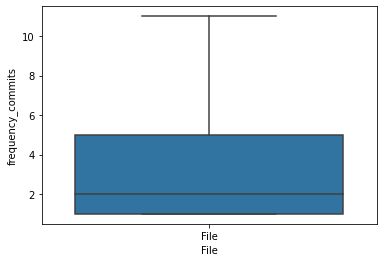

In [ ]:
plt.figure(figsize=(6,4))

# Constroi o Boxsplot sem os outliers
sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl, showfliers=False)

In [ ]:
# Remove as frequencias muito baixas (total de commits < 10)
df_boxplot_fc_java_impl2 = df_boxplot_fc_java_impl.drop(df_boxplot_fc_java_impl[df_boxplot_fc_java_impl.frequency_commits < 10].index)
df_boxplot_fc_java_impl2

,frequency_commits,File
5,11,File
8,10,File
9,25,File
13,11,File
15,19,File
...,...,...
1913,19,File
1931,26,File
1933,14,File
1938,10,File


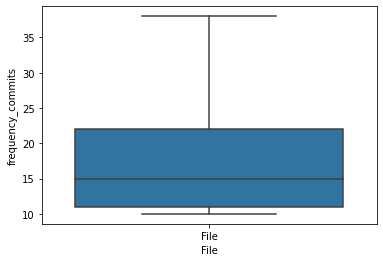

In [ ]:
plt.figure(figsize=(6,4))

# Constroi o Boxsplot sem os outliers
sns.boxplot(x='File', y='frequency_commits', data=df_boxplot_fc_java_impl2, showfliers=False)

In [ ]:
fc_q1_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [25])
fc_q2_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [50])
fc_q3_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [75])
fc_q4_java_impl = np.percentile(df_boxplot_fc_java_impl2.frequency_commits , [100])

print(f'Quartis da Frequencia de Commits Q1: {fc_q1_java_impl}, Q2: {fc_q2_java_impl}, Q3: {fc_q3_java_impl}, Q4: {fc_q4_java_impl}')

Quartis da Frequencia de Commits Q1: [11.], Q2: [15.], Q3: [22.], Q4: [144.]


# 6. Merge of Data from EM (Accumulated Modified LOCs) and FC (File Occurrency in Commits) (step 11)

In [ ]:
# EM from df_arquivos_mais_locs_modificados -> df_locm
print('LOCM')
df_locm.info()

print('')

print('FC')
# FC from df_arquivos_mais_modificados -> df_fc
df_fc.info()

LOCM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2643 non-null   object
 1   modified_lines  2643 non-null   int64 
 2   File            2643 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.1+ KB

FC
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2643 entries, 0 to 2642
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2643 non-null   object
 1   frequency_commits  2643 non-null   int64 
 2   File               2643 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.1+ KB


In [ ]:
df_em_fc = df_locm[['name','modified_lines']]
df_em_fc['frequency_commits'] = df_fc['frequency_commits']
df_em_fc

,name,modified_lines,frequency_commits
0,.gitignore,35,8
1,.rat-excludes,34,1
2,002cassandra_logdir_fix.dpatch,67,4
3,AbstractAllocator.java,1,1
4,AbstractAnalyzer.java,67,3
...,...,...,...
2638,wcwidth.py,85,4
2639,winpty.py,50,1
2640,workspace.xml,378,7
2641,world_cities_a.csv,1,1


In [ ]:
df_fator_multiplicacao = df_em_fc.copy()
df_fator_multiplicacao['factor1'] = df_fator_multiplicacao['modified_lines'] * df_fator_multiplicacao['frequency_commits']
df_fator_multiplicacao

,name,modified_lines,frequency_commits,factor1
0,.gitignore,35,8,280
1,.rat-excludes,34,1,34
2,002cassandra_logdir_fix.dpatch,67,4,268
3,AbstractAllocator.java,1,1,1
4,AbstractAnalyzer.java,67,3,201
...,...,...,...,...
2638,wcwidth.py,85,4,340
2639,winpty.py,50,1,50
2640,workspace.xml,378,7,2646
2641,world_cities_a.csv,1,1,1


# 7. Generates Scatter plots between EM (Changes of LoCs) and FC (Frequency of Commits) (steps 12, 13)

## 7.1 All files

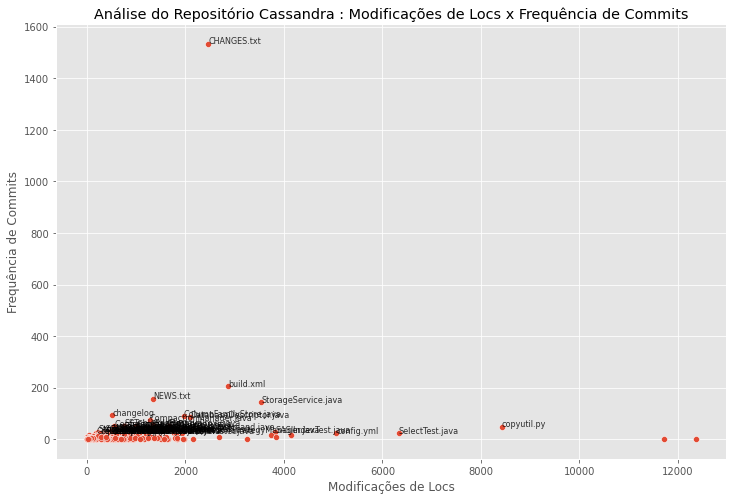

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_em_fc, x='modified_lines', y='frequency_commits')

abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}

plt.title(f"Análise do Repositório Cassandra : {abbr['modified_lines']} x {abbr['frequency_commits']}")
plt.xlabel(abbr['modified_lines'])
plt.ylabel(abbr['frequency_commits'])
          
for i in range(df_em_fc.shape[0]):
  if df_em_fc.modified_lines[i] > em_q3 and df_em_fc.frequency_commits[i] > fc_q3: 
    plt.text(df_em_fc.modified_lines[i], y=df_em_fc.frequency_commits[i], s=df_em_fc.name[i], alpha=0.8, fontsize=8)

plt.show()

In [ ]:
import plotly.graph_objects as go

#https://plotly.com/python/line-and-scatter/
#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
#https://plotly.com/python/creating-and-updating-figures/
#https://plotly.com/python/setting-graph-size/
#https://plotly.com/python/axes/
#https://www.linkedin.com/pulse/complete-introduction-plotly-from-beginner-advanced-pranjall-kumar

# array de complexidade ciclomatica
array_cc = np.random.randint(1, 300, size=300)
# Add traces
fig = go.Figure(data=go.Scatter(
                    x=df_em_fc.modified_lines, 
                    y=df_em_fc.frequency_commits,
                    mode='markers',
                    name='markers',
                    customdata=df_em_fc.name,
                    hovertext=df_em_fc.name, 
                    marker=dict(size=8, color=array_cc, colorscale='Blues', showscale=True, colorbar={"title": 'CC'})
                    )
                  )

fig.update_layout({"title_text": "LoC Mofications x Commit Frequency"},     
                  width=1000,
                  height=600
                  )
fig.update_xaxes(
        title_text = "LoC Modifications",
        title_font = {"size": 10}
        )
fig.update_yaxes(
        title_text = "Commit Frequency",
        title_font = {"size": 10}
        )

fig.show()

## 7.2 Only .java files

In [ ]:
# Cria um df sem os arquivos de Teste
df_em_fc_no_test = df_em_fc[(df_em_fc["name"].str.contains('Test') == False)]

# Cria um df contendo apenas os arquivos .java de implementacao
df_em_fc_java_impl = df_em_fc_no_test[df_em_fc_no_test['name'].str.contains('.java', regex=False)]
df_em_fc_java_impl

,name,modified_lines,frequency_commits
3,AbstractAllocator.java,1,1
4,AbstractAnalyzer.java,67,3
5,AbstractBTreePartition.java,132,11
6,AbstractBufferClusteringPrefix.java,72,1
7,AbstractCType.java,6,2
...,...,...,...
1965,WriteResponseHandler.java,13,1
1966,WriteType.java,3,1
1967,WritetimeOrTTLSelector.java,8,2
1968,YamlConfigurationLoader.java,222,10


In [ ]:
df_fator_multiplicacao_em_fc_java_impl = df_em_fc_java_impl.copy()
df_fator_multiplicacao_em_fc_java_impl['factor1'] = df_fator_multiplicacao_em_fc_java_impl['modified_lines'] * df_fator_multiplicacao_em_fc_java_impl['frequency_commits']
df_fator_multiplicacao_em_fc_java_impl

,name,modified_lines,frequency_commits,factor1
3,AbstractAllocator.java,1,1,1
4,AbstractAnalyzer.java,67,3,201
5,AbstractBTreePartition.java,132,11,1452
6,AbstractBufferClusteringPrefix.java,72,1,72
7,AbstractCType.java,6,2,12
...,...,...,...,...
1965,WriteResponseHandler.java,13,1,13
1966,WriteType.java,3,1,3
1967,WritetimeOrTTLSelector.java,8,2,16
1968,YamlConfigurationLoader.java,222,10,2220


In [ ]:
s = df_fator_multiplicacao_em_fc_java_impl.copy()
s

,name,modified_lines,frequency_commits,factor1
3,AbstractAllocator.java,1,1,1
4,AbstractAnalyzer.java,67,3,201
5,AbstractBTreePartition.java,132,11,1452
6,AbstractBufferClusteringPrefix.java,72,1,72
7,AbstractCType.java,6,2,12
...,...,...,...,...
1965,WriteResponseHandler.java,13,1,13
1966,WriteType.java,3,1,3
1967,WritetimeOrTTLSelector.java,8,2,16
1968,YamlConfigurationLoader.java,222,10,2220


In [ ]:
# selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
#lista_arquivos_criticos = [("StorageService.java", 3537, 144), ("ColumnFamilyStore.java", 1966, 89), ("DatabaseDescriptor.java", 2092, 87), ("CompactionManager.java", 1279, 74), ("StorageProxy.java", 1667, 53), ("SSTableReader.java", 767, 53), ("Config.java", 553, 52), ("CassandraDaemon.java", 1001, 51), ("SelectStatement.java", 1174, 44), ("SinglePartitionReadCommand.java", 994, 38),("NodeProbe.java", 513, 37), ("MessagingService.java", 574, 36)]
#searchfor = lista_arquivos_criticos
#print(searchfor)

In [ ]:
# "|".join(searchfor)

In [ ]:
#s[s["name"].str.contains("'|'".join(searchfor))]

In [ ]:
#s[s["name"].str.contains('StorageService.java|ColumnFamilyStore.java|DatabaseDescriptor.java|CompactionManager.java|StorageProxy.java|SSTableReader.java|Config.java|CassandraDaemon.java|SelectStatement.java|SinglePartitionReadCommand.java|NodeProbe.java|MessagingService.java')]

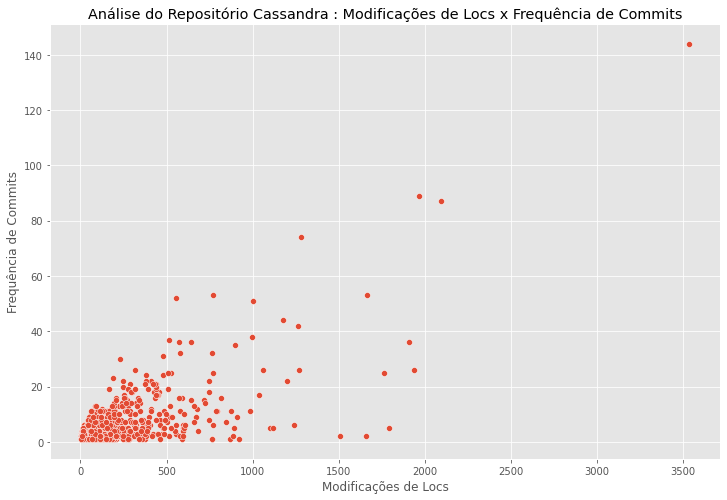

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}

plt.title(f"Análise do Repositório Cassandra : {abbr['modified_lines']} x {abbr['frequency_commits']}")
plt.xlabel(abbr['modified_lines'])
plt.ylabel(abbr['frequency_commits'])

plt.show()

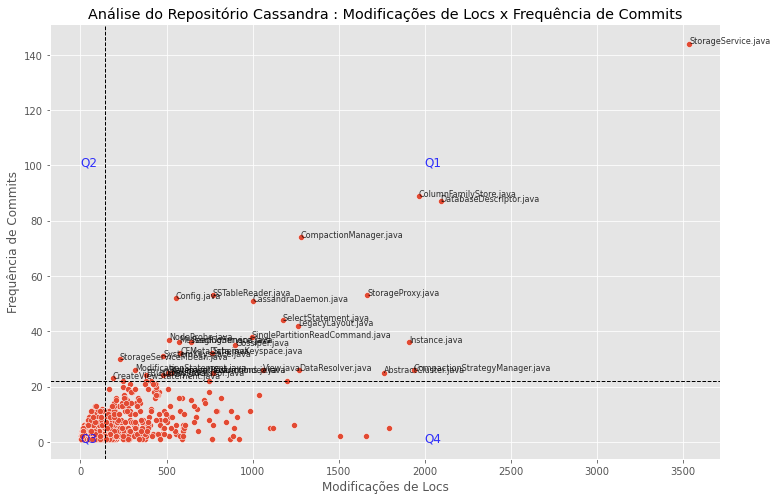

In [ ]:
lista_temp_index_modified_lines = []
for items in df_em_fc_java_impl.modified_lines.iteritems():
  lista_temp_index_modified_lines.append((items[0], items[1]))

list_initial_critical_files_from_sp = []

plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

abbr={'titulo':'Modificações de LoCs x Frequência de Commits', 'modified_lines':'Modificações de Locs', 'frequency_commits':'Frequência de Commits'}

plt.title(f"Análise do Repositório Cassandra : {abbr['modified_lines']} x {abbr['frequency_commits']}")
plt.xlabel(abbr['modified_lines'])
plt.ylabel(abbr['frequency_commits'])
          
for i in lista_temp_index_modified_lines:
  if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl: 
      plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)
      list_initial_critical_files_from_sp.append( (df_em_fc_java_impl.name[i[0]], df_em_fc_java_impl.modified_lines[i[0]], df_em_fc_java_impl.frequency_commits[i[0]]) )

#Mean values          
plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1) 
plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)           

#Quadrant Marker          
plt.text(x=2000, y=100, s="Q1",alpha=0.8,fontsize=12, color='b')
plt.text(x=2000, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
plt.text(x=0, y=100, s="Q2", alpha=0.8,fontsize=12, color='b')  

plt.show()

In [ ]:
for item in list_initial_critical_files_from_sp:
  print(item)

('AbstractCluster.java', 1764, 25)
('CFMetaData.java', 581, 32)
('CassandraDaemon.java', 1001, 51)
('ColumnFamilyStore.java', 1966, 89)
('ColumnIndex.java', 771, 25)
('CompactionManager.java', 1279, 74)
('CompactionStrategyManager.java', 1937, 26)
('Config.java', 553, 52)
('CreateViewStatement.java', 188, 23)
('DataResolver.java', 1270, 26)
('DatabaseDescriptor.java', 2092, 87)
('FBUtilities.java', 380, 24)
('Gossiper.java', 899, 35)
('Instance.java', 1908, 36)
('Keyspace.java', 524, 25)
('LegacyLayout.java', 1266, 42)
('MessagingService.java', 574, 36)
('ModificationStatement.java', 319, 26)
('NodeProbe.java', 513, 37)
('QueryProcessor.java', 477, 24)
('ReadCommand.java', 642, 36)
('SSTableReader.java', 767, 53)
('SchemaKeyspace.java', 766, 32)
('SelectStatement.java', 1174, 44)
('SinglePartitionReadCommand.java', 994, 38)
('StatementRestrictions.java', 511, 25)
('StorageProxy.java', 1667, 53)
('StorageService.java', 3537, 144)
('StorageServiceMBean.java', 229, 30)
('SystemKeyspace.ja

In [ ]:
# Pego da secao de analise de Architectural Smells
# selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
my_temp_lista_arquivos_criticos = [("StorageService.java", 3537, 144), ("ColumnFamilyStore.java", 1966, 89), ("DatabaseDescriptor.java", 2092, 87), ("CompactionManager.java", 1279, 74), ("StorageProxy.java", 1667, 53), ("SSTableReader.java", 767, 53), ("Config.java", 553, 52), ("CassandraDaemon.java", 1001, 51), ("SelectStatement.java", 1174, 44), ("SinglePartitionReadCommand.java", 994, 38),("NodeProbe.java", 513, 37), ("MessagingService.java", 574, 36)]

my_temp_lista_arquivos_criticos_names = []
for i in range(0,  len(my_temp_lista_arquivos_criticos)):
  my_temp_lista_arquivos_criticos_names.append(my_temp_lista_arquivos_criticos[i][0])

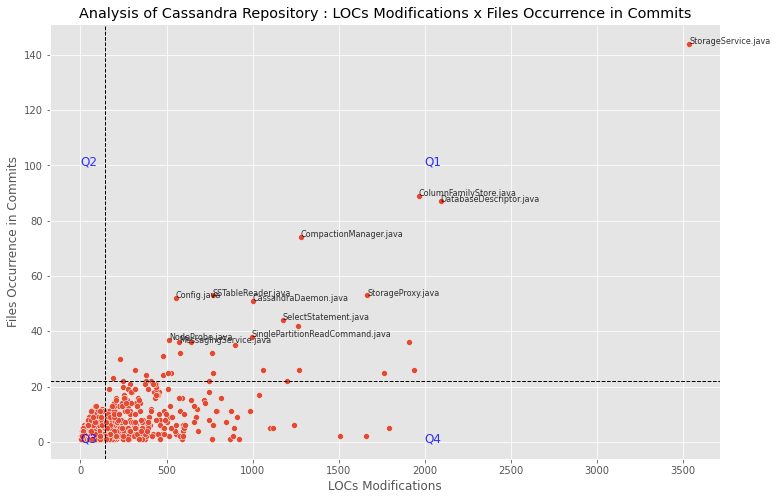

In [ ]:
lista_temp_index_modified_lines = []
for items in df_em_fc_java_impl.modified_lines.iteritems():
  lista_temp_index_modified_lines.append((items[0], items[1]))

list_initial_critical_files_from_sp = []

plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_em_fc_java_impl, x='modified_lines', y='frequency_commits')

abbr={'titulo':'LOCs Modifications x Files Occurrence in Commits', 'modified_lines':'LOCs Modifications', 'frequency_commits':'Files Occurrence in Commits'}

plt.title(f"Analysis of Cassandra Repository : {abbr['modified_lines']} x {abbr['frequency_commits']}")
plt.xlabel(abbr['modified_lines'])
plt.ylabel(abbr['frequency_commits'])
          
for i in lista_temp_index_modified_lines:
  if df_em_fc_java_impl.modified_lines[i[0]] > em_q3_java_impl and df_em_fc_java_impl.frequency_commits[i[0]] > fc_q3_java_impl: 
    if df_em_fc_java_impl.name[i[0]] in my_temp_lista_arquivos_criticos_names:
      plt.text(df_em_fc_java_impl.modified_lines[i[0]], y=df_em_fc_java_impl.frequency_commits[i[0]], s=df_em_fc_java_impl.name[i[0]], alpha=0.8, fontsize=8)

#Mean values          
plt.axvline(x=em_q3_java_impl, color='k',linestyle='--', linewidth=1) 
plt.axhline(y=fc_q3_java_impl, color='k', linestyle='--', linewidth=1)           

#Quadrant Marker          
plt.text(x=2000, y=100, s="Q1",alpha=0.8,fontsize=12, color='b')
plt.text(x=2000, y=0, s="Q4",alpha=0.8,fontsize=12, color='b')
plt.text(x=0, y=0, s="Q3", alpha=0.8,fontsize=12, color='b')
plt.text(x=0, y=100, s="Q2", alpha=0.8,fontsize=12, color='b')  

plt.savefig('scatter_plot_mloc_foc.png')
plt.show()

In [ ]:
import plotly.graph_objects as go

#https://plotly.com/python/line-and-scatter/
#https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html
#https://plotly.com/python/creating-and-updating-figures/
#https://plotly.com/python/setting-graph-size/
#https://plotly.com/python/axes/
#https://www.linkedin.com/pulse/complete-introduction-plotly-from-beginner-advanced-pranjall-kumar

# array de complexidade ciclomatica
array_cc = np.random.randint(1, 300, size=300)
# Add traces
fig = go.Figure(data=go.Scatter(
                    x=df_em_fc_java_impl.modified_lines, 
                    y=df_em_fc_java_impl.frequency_commits,
                    mode='markers',
                    name='markers',
                    customdata=df_em_fc_java_impl.name,
                    hovertext=df_em_fc_java_impl.name, 
                    marker=dict(size=8, color=array_cc, colorscale='Blues', showscale=True, colorbar={"title": 'CC'})
                    )
                  )

fig.update_layout({"title_text": "LoC Mofications x Commit Frequency"},     
                  width=1000,
                  height=600
                  )
fig.update_xaxes(
        title_text = "LoC Modifications",
        title_font = {"size": 10}
        )
fig.update_yaxes(
        title_text = "Commit Frequency",
        title_font = {"size": 10}
        )

fig.show()

# 8. Architectural Smell (Arcan2) (step 5)

1. List the classes with architectural smells

- Cyclical dependence
- hub like dependency

2. Show the files that depend on the parsed file

3. How architectural smell files behave over time

4. How do files that depend on file x behave over time?

## Data set

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kfSUPUnjKY-f9R1xLv81qqAkW7u7Fbuz' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kfSUPUnjKY-f9R1xLv81qqAkW7u7Fbuz" -O smell-affects.csv && rm -rf /tmp/cookies.txt

--2022-07-04 13:28:56--  https://docs.google.com/uc?export=download&confirm=&id=1kfSUPUnjKY-f9R1xLv81qqAkW7u7Fbuz
Resolving docs.google.com (docs.google.com)... 74.125.142.113, 74.125.142.100, 74.125.142.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/etl49jirk4e81unou9hstdrue7rjseh2/1656941325000/13935452558485945860/*/1kfSUPUnjKY-f9R1xLv81qqAkW7u7Fbuz?e=download&uuid=813acdaa-8bc0-443f-b523-7f7b9316f878 [following]
--2022-07-04 13:28:58--  https://doc-08-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/etl49jirk4e81unou9hstdrue7rjseh2/1656941325000/13935452558485945860/*/1kfSUPUnjKY-f9R1xLv81qqAkW7u7Fbuz?e=download&uuid=813acdaa-8bc0-443f-b523-7f7b9316f878
Resolving doc-08-04-docs.googleusercontent.com (doc-08-04-docs.googleusercontent.com)... 142.250.107.132, 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Tp0lgajYUQQiLKzzICST_o96m3it3yDr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Tp0lgajYUQQiLKzzICST_o96m3it3yDr" -O smell-characteristics.csv && rm -rf /tmp/cookies.txt

--2022-07-04 13:29:03--  https://docs.google.com/uc?export=download&confirm=&id=1Tp0lgajYUQQiLKzzICST_o96m3it3yDr
Resolving docs.google.com (docs.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8sbu6qio885ag0387a64nv5342q3dent/1656941325000/13935452558485945860/*/1Tp0lgajYUQQiLKzzICST_o96m3it3yDr?e=download&uuid=6e47e8d4-20b0-46c0-98e1-d7d899a37ceb [following]
--2022-07-04 13:29:06--  https://doc-08-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8sbu6qio885ag0387a64nv5342q3dent/1656941325000/13935452558485945860/*/1Tp0lgajYUQQiLKzzICST_o96m3it3yDr?e=download&uuid=6e47e8d4-20b0-46c0-98e1-d7d899a37ceb
Resolving doc-08-04-docs.googleusercontent.com (doc-08-04-docs.googleusercontent.com)... 142.250.107.132, 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uN8uNp7Ek6CfYmVrAaYtaRxCGyj4DEwv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uN8uNp7Ek6CfYmVrAaYtaRxCGyj4DEwv" -O component-metrics.csv && rm -rf /tmp/cookies.txt

--2022-07-04 13:29:07--  https://docs.google.com/uc?export=download&confirm=&id=1uN8uNp7Ek6CfYmVrAaYtaRxCGyj4DEwv
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.102, 74.125.195.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f09pj55lrau8dkpmp4vrrhugg6img3ef/1656941325000/13935452558485945860/*/1uN8uNp7Ek6CfYmVrAaYtaRxCGyj4DEwv?e=download&uuid=0e8eb650-503a-43fa-a72f-fc1b9d787274 [following]
--2022-07-04 13:29:07--  https://doc-14-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/f09pj55lrau8dkpmp4vrrhugg6img3ef/1656941325000/13935452558485945860/*/1uN8uNp7Ek6CfYmVrAaYtaRxCGyj4DEwv?e=download&uuid=0e8eb650-503a-43fa-a72f-fc1b9d787274
Resolving doc-14-04-docs.googleusercontent.com (doc-14-04-docs.googleusercontent.com)... 142.250.107.132, 

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Xv46b6xXDv0Bmc8J5MF_3c-WhViDvexn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Xv46b6xXDv0Bmc8J5MF_3c-WhViDvexn" -O component-membership.csv && rm -rf /tmp/cookies.txt

--2022-07-04 13:29:09--  https://docs.google.com/uc?export=download&confirm=&id=1Xv46b6xXDv0Bmc8J5MF_3c-WhViDvexn
Resolving docs.google.com (docs.google.com)... 74.125.142.138, 74.125.142.101, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ebtlv93a7itkhok60afj8a3oogd97ft/1656941325000/13935452558485945860/*/1Xv46b6xXDv0Bmc8J5MF_3c-WhViDvexn?e=download&uuid=bc285cd9-00db-4536-8426-e62fc9e76c67 [following]
--2022-07-04 13:29:10--  https://doc-0k-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6ebtlv93a7itkhok60afj8a3oogd97ft/1656941325000/13935452558485945860/*/1Xv46b6xXDv0Bmc8J5MF_3c-WhViDvexn?e=download&uuid=bc285cd9-00db-4536-8426-e62fc9e76c67
Resolving doc-0k-04-docs.googleusercontent.com (doc-0k-04-docs.googleusercontent.com)... 142.250.107.132, 

In [ ]:
PATH_OUTPUT_TESTES_ARCAN2_CASSANDRA="/content"

In [ ]:
df_smell_affected = pd.read_csv(PATH_OUTPUT_TESTES_ARCAN2_CASSANDRA + '/' + 'smell-affects.csv')
df_smell_characteristics = pd.read_csv(PATH_OUTPUT_TESTES_ARCAN2_CASSANDRA + '/' + 'smell-characteristics.csv')
df_component_metrics = pd.read_csv(PATH_OUTPUT_TESTES_ARCAN2_CASSANDRA + '/' + 'component-metrics.csv')
df_component_membership = pd.read_csv(PATH_OUTPUT_TESTES_ARCAN2_CASSANDRA + '/' + 'component-membership.csv') 

### Smell Affected

In [ ]:
df_smell_affected[['version', 'componentNameInVersion', 'edgeLabel', 'smellIdInVersion']]

,version,componentNameInVersion,edgeLabel,smellIdInVersion
0,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114897
1,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.audit.AuditLogManager,affects,114897
2,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.auth.AuthCache,affects,114897
3,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.auth.CacheRefresher,affects,114897
4,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.audit.AuditLogEntry,affects,114897
...,...,...,...,...
410217,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.db.partitions,affects,550281
410218,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.tracing,affects,550270
410219,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.index.transactions,affects,550293
410220,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.io.compress,affects,550299


In [ ]:
# Example: StorageService
df_as_component = df_smell_affected[['version', 'componentNameInVersion', 'edgeLabel', 'smellIdInVersion']]
df_as_component[df_as_component['componentNameInVersion'].str.contains('StorageService', regex=False)]

,version,componentNameInVersion,edgeLabel,smellIdInVersion
0,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114897
9,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114907
16,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114918
28,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114937
46,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,114977
...,...,...,...,...
393777,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,528800
393782,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,528821
393785,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,528810
393791,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,affects,528831


### Smell Characteristics

In [ ]:
df_smell_characteristics[['version', 'smellType', 'AffectedLevel','Shape', 'affectedElements']]

,version,smellType,AffectedLevel,Shape,affectedElements
0,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.schema.ColumnMetadata, o..."
1,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,[org.apache.cassandra.service.reads.repair.Abs...
2,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
3,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
...,...,...,...,...,...
5644,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
5645,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.service, org.apache.cass..."
5646,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.transport.Envelope, org...."
5647,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.concurrent.Stage, org.ap..."


In [ ]:
df_as_affected = df_smell_characteristics[['version', 'smellType', 'AffectedLevel','Shape', 'affectedElements']]
df_as_affected[df_as_affected['affectedElements'].str.contains('StorageService', regex=False)]

,version,smellType,AffectedLevel,Shape,affectedElements
80,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.service.StorageService, ..."
85,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.service.StorageService, ..."
91,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.audit.AuditLogOptions, o..."
96,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.audit.AuditLogOptions, o..."
110,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,[org.apache.cassandra.auth.AllowAllAuthenticat...
...,...,...,...,...,...
4940,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4947,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4999,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,[org.apache.cassandra.service.reads.range.Repl...
5246,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,cyclicDep,single,CIRCLE,"[org.apache.cassandra.db.rows.Rows, org.apache..."


In [ ]:
df_as_affected['affectedElements'][80]

'[org.apache.cassandra.service.StorageService, org.apache.cassandra.auth.AuthenticatedUser, org.apache.cassandra.audit.AuditLogEntry, org.apache.cassandra.auth.CacheRefresher, org.apache.cassandra.audit.AuditLogManager, org.apache.cassandra.auth.AuthCache]'

### Component Metrics

In [ ]:
df_component_metrics[['version', 'name', 'componentLabel', 'componentType', 'LinesOfCode', 'TotalAmountOfChanges', 'filePathReal']]

,version,name,componentLabel,componentType,LinesOfCode,TotalAmountOfChanges,filePathReal
0,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types,container,container,10220,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...
1,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service,container,container,14845,0,.
2,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.conditions,container,container,1084,0,.
3,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.utils.obs,container,container,982,0,.
4,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.db.commitlog,container,container,5151,0,.
...,...,...,...,...,...,...,...
2181,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.db.partitions.AbstractUnf...,unit,ABSTRACT_CLASS,26,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...
2182,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.selection.SelectionC...,unit,CONCRETE_CLASS,107,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...
2183,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.repair.consistent.LocalSe...,unit,CONCRETE_CLASS,946,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...
2184,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.dht.tokenallocator.Replic...,unit,CONCRETE_CLASS,483,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...


In [ ]:
df_component = df_component_metrics[['version', 'name', 'componentLabel', 'componentType', 'LinesOfCode', 'TotalAmountOfChanges', 'filePathReal']]
df_component[df_component['name'].str.contains('StorageService', regex=False)]

,version,name,componentLabel,componentType,LinesOfCode,TotalAmountOfChanges,filePathReal
284,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageServiceMBean,unit,INTERFACE,719,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...
1950,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,unit,CONCRETE_CLASS,5446,0,/home/ubuntu/arcan2/cassandra/src/java/org/apa...


### Component Membership

In [ ]:
df_component_membership[['version', 'childName', 'parentName']]

,version,childName,parentName
0,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types.Abst...,org.apache.cassandra.cql3.functions.types
1,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types.Gett...,org.apache.cassandra.cql3.functions.types
2,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types.Sett...,org.apache.cassandra.cql3.functions.types
3,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types.Type...,org.apache.cassandra.cql3.functions.types
4,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.cql3.functions.types.Meta...,org.apache.cassandra.cql3.functions.types
...,...,...,...
2147,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.io.sstable.IndexSummaryMa...,org.apache.cassandra.io.sstable
2148,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.io.sstable.SSTableSimpleI...,org.apache.cassandra.io.sstable
2149,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.io.sstable.IndexInfo,org.apache.cassandra.io.sstable
2150,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.io.sstable.format,org.apache.cassandra.io.sstable


In [ ]:
df_child = df_component_membership[['version', 'childName', 'parentName']]
df_child[df_child['childName'].str.contains('StorageService', regex=False)]

,version,childName,parentName
199,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageService,org.apache.cassandra.service
204,d4986a68-b82b-4bb5-8e6b-d8c5f8226f70,org.apache.cassandra.service.StorageServiceMBean,org.apache.cassandra.service


## Cycle Dependency

In [ ]:
# DataFrame com as classes que possuem Cycle Dependency
df_cycle_dependency = df_smell_characteristics[ ['smellType','affectedElements'] ].query("smellType=='cyclicDep'")
df_cycle_dependency

,smellType,affectedElements
0,cyclicDep,"[org.apache.cassandra.schema.ColumnMetadata, o..."
1,cyclicDep,[org.apache.cassandra.service.reads.repair.Abs...
2,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
3,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
...,...,...
5644,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
5645,cyclicDep,"[org.apache.cassandra.service, org.apache.cass..."
5646,cyclicDep,"[org.apache.cassandra.transport.Envelope, org...."
5647,cyclicDep,"[org.apache.cassandra.concurrent.Stage, org.ap..."


In [ ]:
df_cycle_dependency[df_cycle_dependency['affectedElements'].str.contains('StorageService', regex=False)]

,smellType,affectedElements
80,cyclicDep,"[org.apache.cassandra.service.StorageService, ..."
85,cyclicDep,"[org.apache.cassandra.service.StorageService, ..."
91,cyclicDep,"[org.apache.cassandra.audit.AuditLogOptions, o..."
96,cyclicDep,"[org.apache.cassandra.audit.AuditLogOptions, o..."
110,cyclicDep,[org.apache.cassandra.auth.AllowAllAuthenticat...
...,...,...
4940,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4947,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."
4999,cyclicDep,[org.apache.cassandra.service.reads.range.Repl...
5246,cyclicDep,"[org.apache.cassandra.db.rows.Rows, org.apache..."


## Hublike Dependency

In [ ]:
# DataFrame com as classes que possuem Hublike Dependency
df_hublike_dependency = df_smell_characteristics[ ['smellType','affectedElements'] ].query("smellType=='hubLikeDep'")
df_hublike_dependency

,smellType,affectedElements
3235,hubLikeDep,[org.apache.cassandra.db.streaming.CassandraSt...
3311,hubLikeDep,[org.apache.cassandra.db.streaming.CassandraSt...
3372,hubLikeDep,"[org.apache.cassandra.io.compress, org.apache...."


In [ ]:
df_hublike_dependency[df_hublike_dependency['affectedElements'].str.contains('StorageService', regex=False)]

,smellType,affectedElements
3235,hubLikeDep,[org.apache.cassandra.db.streaming.CassandraSt...


# 9. Creating the Dependency Matrix (DSM) (step 15)

DSM: fa depends on fb

	   f1 f2 f3 ... fn

f1   x  1  0 ...  0

f2   0  x  1 ...  1

f3   0  0  x ...  0

f1 depends on f2, f2 depends on f3

DSM1 ( dicionario_dsm['fa'] ) -> given the file fa returns all files that fa uses

DSM2 ( dicionario_dsm_depende_de['fa'] ) -> given file fa returns all files that depend on fa

In [ ]:
# Gera um arquivo contendo todos os arquivos .java do projeto Cassandra
!find cassandra/src/java/org/apache/cassandra -name "*.java" > arquivosjava.txt

In [ ]:
# Mostra os 10 primeiros arquivos .java 
!head -10 arquivosjava.txt

cassandra/src/java/org/apache/cassandra/index/Index.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/Descriptor.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/TokenTreeBuilder.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/DynamicTokenTreeBuilder.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/OnDiskIndexBuilder.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/OnDiskIndex.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/TokenTree.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/Token.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/OnDiskBlock.java
cassandra/src/java/org/apache/cassandra/index/sasi/disk/PerSSTableIndexWriter.java


In [ ]:
# Cria duas listas contendo o conjunto de arquivos da versão analisada
lista_linhas_arquivos_cassandra = []
lista_colunas_arquivos_cassandra = []

with open('arquivosjava.txt', mode='r+', encoding='utf-8') as file:
  for line in file:  
    line = line.rstrip()
    line = line.replace('cassandra/src/java/', '')
    line = line.replace('/', '.')
    lista_linhas_arquivos_cassandra.append(line)
    lista_colunas_arquivos_cassandra.append(line)

In [ ]:
# Dado 'org.apache.cassandra.index.Index.java'
# Retorne 'pilot/analises/designite/v-3-11-11/src/java/org/apache/cassandra/index/Index.java'

def get_path_file(my_file, src_java_path='cassandra/src/java/'):
  path_file = None
  my_file = my_file.replace('.java', '') # org.apache.cassandra.index.Index
  my_file = my_file.replace('.', '/') # org/apache/cassandra/index/Index
  my_file = my_file + '.java' # org/apache/cassandra/index/Index.java
  path_file =  src_java_path  + my_file 
  return path_file

def teste_find_word_in_file(my_file, my_word):
    with open(my_file) as f:
        datafile = f.readlines()
        found = False  # This isn't really necessary
        for line in datafile:
          if my_word in line:
            # found = True # Not necessary
            return True
    return False  # Because you finished the search without finding
  
def lista_arquivos_que_dependem_de(my_file, dicionario):
  lista_temp = []
  my_file = my_file.replace('/','.')
  if my_file in dicionario:
    for each in dicionario[my_file]:
      if each[2] == 1: 
        lista_temp.append(each)
  return lista_temp

## DSM File A uses File B

In [ ]:
import datetime

t1 = datetime.datetime.now()

dicionario_dsm = {}
lista_aux = []

for each_file in lista_linhas_arquivos_cassandra:
  for each_elemento_coluna in lista_colunas_arquivos_cassandra:
    my_search = each_elemento_coluna
    my_search = my_search.replace('.java', ';')
    my_path = get_path_file(my_file=each_file)
    if teste_find_word_in_file(my_file=my_path,my_word=my_search):
      item = (each_file, each_elemento_coluna, 1)
    else:
      item = (each_file, each_elemento_coluna, 0)
    lista_aux.append(item)
  dicionario_dsm[each_file] = lista_aux 
  lista_aux = []
  
t2 = datetime.datetime.now()

delta = t2 - t1

print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm)}')

Tempo para criar o dicionarário dsm: 0:04:32.064515, itens percorridos: 2129


In [ ]:
temp = 'org.apache.cassandra.net.MessagingService.java'
temp = temp.replace('/','.')
print(dicionario_dsm[temp])

[('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.Index.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.Descriptor.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.TokenTreeBuilder.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.DynamicTokenTreeBuilder.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.OnDiskIndexBuilder.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.OnDiskIndex.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.TokenTree.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.Token.java', 0), ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.index.sasi.disk.OnDiskBlock.jav

In [ ]:
# Exemplo: Relação de Arquivos que MessagingService.java depende

i = 1
for tupla in dicionario_dsm[temp]:
  if tupla[2] == 1:
    print(f'{i}, {tupla}')
    i = i + 1

1, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.db.SystemKeyspace.java', 1)
2, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.config.DatabaseDescriptor.java', 1)
3, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.metrics.MessagingMetrics.java', 1)
4, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.concurrent.Stage.java', 1)
5, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.concurrent.ScheduledExecutors.java', 1)
6, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.service.AbstractWriteResponseHandler.java', 1)
7, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.utils.FBUtilities.java', 1)
8, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.utils.concurrent.FutureCombiner.java', 1)
9, ('org.apache.cassandra.net.MessagingService.java', 'org.apache.cassandra.utils.concurrent.AsyncPromise.jav

## DSM File A depends on File B

In [ ]:
t1 = datetime.datetime.now()

dicionario_dsm_depende_de = {}
lista_aux = []

for each_file in lista_linhas_arquivos_cassandra:
  for each_elemento_coluna in lista_colunas_arquivos_cassandra:
    my_search = each_file
    my_search = my_search.replace('.java', ';')
    my_path = get_path_file(my_file=each_elemento_coluna)
    if teste_find_word_in_file(my_file=my_path,my_word=my_search):
      item = (each_elemento_coluna, each_file, 1)
    else:
      item = (each_elemento_coluna, each_file, 0)
    lista_aux.append(item)
  dicionario_dsm_depende_de[each_file] = lista_aux 
  lista_aux = []
  
t2 = datetime.datetime.now()

delta = t2 - t1

print(f'Tempo para criar o dicionarário dsm: {delta}, itens percorridos: {len(dicionario_dsm_depende_de)}')

Tempo para criar o dicionarário dsm: 0:04:54.629847, itens percorridos: 2129


In [ ]:
# Exemplo: Relação de Arquivos que dependem de MessagingService.java

i = 1
for tupla in lista_arquivos_que_dependem_de(my_file='org.apache.cassandra.net.MessagingService.java', dicionario=dicionario_dsm_depende_de):
  if tupla[2] == 1:
    print(f'{i}, {tupla}')
    i += 1

1, ('org.apache.cassandra.db.commitlog.CommitLogDescriptor.java', 'org.apache.cassandra.net.MessagingService.java', 1)
2, ('org.apache.cassandra.db.commitlog.CommitLog.java', 'org.apache.cassandra.net.MessagingService.java', 1)
3, ('org.apache.cassandra.db.virtual.InternodeInboundTable.java', 'org.apache.cassandra.net.MessagingService.java', 1)
4, ('org.apache.cassandra.db.virtual.InternodeOutboundTable.java', 'org.apache.cassandra.net.MessagingService.java', 1)
5, ('org.apache.cassandra.db.CounterMutationVerbHandler.java', 'org.apache.cassandra.net.MessagingService.java', 1)
6, ('org.apache.cassandra.db.TruncateVerbHandler.java', 'org.apache.cassandra.net.MessagingService.java', 1)
7, ('org.apache.cassandra.db.SystemKeyspace.java', 'org.apache.cassandra.net.MessagingService.java', 1)
8, ('org.apache.cassandra.db.filter.ColumnFilter.java', 'org.apache.cassandra.net.MessagingService.java', 1)
9, ('org.apache.cassandra.db.ReadResponse.java', 'org.apache.cassandra.net.MessagingService.jav

# Analysis (steps 14, 16, 17 and 18)

RQ 1) How to identify code artifacts that may indicate the presence of Architectural Technical Debt through Architec- tural Smells (AS) and Design Smells (DS)?


RQ 2) How do these source code files with AS and DS impact other source code files over time?


RQ 3) What is the impact on the maintenance effort of these source code files with AS and DS in relation to the other source code files of the project?

## Support Functions

In [ ]:
# Dada uma classe e o arquivo texto contendo todos os arquivos do repositorio, 
# retorna o pacote da classe junto com classe
def get_file_package(my_file, my_content):
  with open(my_content, mode='r+', encoding='utf-8') as file:
    for line in file:
      if my_file in line:
        line = line.replace('cassandra/src/java/', '')
        line = line.replace('/','.')
        line = line.strip()
        return line

# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a uses file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que file_a chama(importa)
def get_dict_file_a_uses_file_b(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm):
  dict_file_a_uses_file_b = {}
  lista_file_a_uses_file_b = []
  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content)
    for each_tupla in my_dictionary[key_file]:
      if each_tupla[2] == 1:
        lista_file_a_uses_file_b.append(each_tupla[1])
    dict_file_a_uses_file_b[key_file] = lista_file_a_uses_file_b
    lista_file_a_uses_file_b = []
  return dict_file_a_uses_file_b

# Todo: revisar, pois está substituindo config.java por GuardrailsConfig.java
# Dada a lista de arquivos criticos [(arquivo1, qtd linhas modificadas, frequencia de commits), (), ...]
# arquivo texto contendo todos os arquivos do repositorio
# dicionario com a DSM file_a depende de file_b
# retorna o dicionario com chave file_a e valores lista de arquivos que dependem de file_a
def get_dict_file_impact_other_files(lista_arquivos_criticos, content='arquivosjava.txt', my_dictionary=dicionario_dsm_depende_de):
  dict_file_impact_other_files = {}
  lista_file_a_depends_on_file_b = []
  
  for each in lista_arquivos_criticos:
    item = each[0]
    key_file = get_file_package(my_file=item, my_content=content)
    for tupla in lista_arquivos_que_dependem_de(my_file=key_file, dicionario=my_dictionary):
      if tupla[2] == 1:
        lista_file_a_depends_on_file_b.append(tupla[0])
    dict_file_impact_other_files[key_file] = lista_file_a_depends_on_file_b
    lista_file_a_depends_on_file_b = []
  return dict_file_impact_other_files

## Critical Files (RQ1)

In [ ]:
# selecao de classes criticas que pertencem ao Q1 (quadrante1) -> Modified LOC ALTA e Frequencia de Commits Alta
lista_arquivos_criticos = [("StorageService.java", 3537, 144), ("ColumnFamilyStore.java", 1966, 89), ("DatabaseDescriptor.java", 2092, 87), ("CompactionManager.java", 1279, 74), ("StorageProxy.java", 1667, 53), ("SSTableReader.java", 767, 53), ("Config.java", 553, 52), ("CassandraDaemon.java", 1001, 51), ("SelectStatement.java", 1174, 44), ("SinglePartitionReadCommand.java", 994, 38),("NodeProbe.java", 513, 37), ("MessagingService.java", 574, 36)]

In [ ]:
for each in lista_arquivos_criticos:
  print(each)

('StorageService.java', 3537, 144)
('ColumnFamilyStore.java', 1966, 89)
('DatabaseDescriptor.java', 2092, 87)
('CompactionManager.java', 1279, 74)
('StorageProxy.java', 1667, 53)
('SSTableReader.java', 767, 53)
('Config.java', 553, 52)
('CassandraDaemon.java', 1001, 51)
('SelectStatement.java', 1174, 44)
('SinglePartitionReadCommand.java', 994, 38)
('NodeProbe.java', 513, 37)
('MessagingService.java', 574, 36)


### Search File A uses File B

In [ ]:
get_dict_file_a_uses_file_b(lista_arquivos_criticos)

{'org.apache.cassandra.config.DatabaseDescriptor.java': ['org.apache.cassandra.db.commitlog.CommitLog.java',
  'org.apache.cassandra.db.commitlog.CommitLogSegmentManagerCDC.java',
  'org.apache.cassandra.db.commitlog.AbstractCommitLogSegmentManager.java',
  'org.apache.cassandra.db.commitlog.CommitLogSegmentManagerStandard.java',
  'org.apache.cassandra.db.ConsistencyLevel.java',
  'org.apache.cassandra.auth.IRoleManager.java',
  'org.apache.cassandra.auth.AllowAllInternodeAuthenticator.java',
  'org.apache.cassandra.auth.IAuthorizer.java',
  'org.apache.cassandra.auth.IAuthenticator.java',
  'org.apache.cassandra.auth.IInternodeAuthenticator.java',
  'org.apache.cassandra.auth.AuthConfig.java',
  'org.apache.cassandra.auth.INetworkAuthorizer.java',
  'org.apache.cassandra.audit.AuditLogOptions.java',
  'org.apache.cassandra.dht.IPartitioner.java',
  'org.apache.cassandra.io.FSWriteError.java',
  'org.apache.cassandra.io.util.DiskOptimizationStrategy.java',
  'org.apache.cassandra.io.u

### Search File A depends on File B

In [ ]:
# Relação de Arquivos que dependem de MessagingService.java
dict_file_impact_other_files = {}
lista_file_a_depends_on_file_b = []

for tupla in lista_arquivos_que_dependem_de(my_file='org.apache.cassandra.net.MessagingService.java', dicionario=dicionario_dsm_depende_de):
  if tupla[2] == 1:
    lista_file_a_depends_on_file_b.append(tupla[0])
dict_file_impact_other_files['org.apache.cassandra.net.MessagingService.java'] = lista_file_a_depends_on_file_b

In [ ]:
# org.apache.cassandra.service.CassandraDaemon.java

dict_file_impact_other_files = {}
lista_file_a_depends_on_file_b = []

for tupla in lista_arquivos_que_dependem_de(my_file='org.apache.cassandra.service.CassandraDaemon.java', dicionario=dicionario_dsm_depende_de):
  if tupla[2] == 1:
    lista_file_a_depends_on_file_b.append(tupla[0])
dict_file_impact_other_files['org.apache.cassandra.service.CassandraDaemon.java'] = lista_file_a_depends_on_file_b

In [ ]:
len(dict_file_impact_other_files['org.apache.cassandra.service.CassandraDaemon.java'])

0

In [ ]:
lista_arquivos_criticos

[('StorageService.java', 3537, 144),
 ('ColumnFamilyStore.java', 1966, 89),
 ('DatabaseDescriptor.java', 2092, 87),
 ('CompactionManager.java', 1279, 74),
 ('StorageProxy.java', 1667, 53),
 ('SSTableReader.java', 767, 53),
 ('Config.java', 553, 52),
 ('CassandraDaemon.java', 1001, 51),
 ('SelectStatement.java', 1174, 44),
 ('SinglePartitionReadCommand.java', 994, 38),
 ('NodeProbe.java', 513, 37),
 ('MessagingService.java', 574, 36)]

In [ ]:
# Dado um arquivo chave, mostra a lista de arquivos que dependem do arquivo chave
dict_arquivos_dependentes_arquivos_criticos = get_dict_file_impact_other_files(lista_arquivos_criticos)
dict_arquivos_dependentes_arquivos_criticos

{'org.apache.cassandra.config.DatabaseDescriptor.java': ['org.apache.cassandra.index.sasi.TermIterator.java',
  'org.apache.cassandra.index.IndexRegistry.java',
  'org.apache.cassandra.index.SecondaryIndexManager.java',
  'org.apache.cassandra.db.MutableDeletionInfo.java',
  'org.apache.cassandra.db.commitlog.EncryptedSegment.java',
  'org.apache.cassandra.db.commitlog.PeriodicCommitLogService.java',
  'org.apache.cassandra.db.commitlog.MemoryMappedSegment.java',
  'org.apache.cassandra.db.commitlog.CommitLogReplayer.java',
  'org.apache.cassandra.db.commitlog.GroupCommitLogService.java',
  'org.apache.cassandra.db.commitlog.CommitLogDescriptor.java',
  'org.apache.cassandra.db.commitlog.CommitLogArchiver.java',
  'org.apache.cassandra.db.commitlog.CommitLog.java',
  'org.apache.cassandra.db.commitlog.CommitLogReader.java',
  'org.apache.cassandra.db.commitlog.CommitLogSegmentManagerCDC.java',
  'org.apache.cassandra.db.commitlog.AbstractCommitLogSegmentManager.java',
  'org.apache.cas

## List of Files Impacted by Critical Files (RQ2)

In [ ]:
lista_arquivos_impactados = []
l_ac = []
l_adac = []
l_tamanho_adac = []
for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
  print(key, value)
  l_ac.append(key)
  l_tamanho_adac.append(len(value))
  l_adac.append(value)

org.apache.cassandra.service.StorageService.java ['org.apache.cassandra.db.commitlog.CommitLog.java', 'org.apache.cassandra.db.virtual.PendingHintsTable.java', 'org.apache.cassandra.db.DiskBoundaryManager.java', 'org.apache.cassandra.db.DiskBoundaries.java', 'org.apache.cassandra.db.compaction.CompactionManager.java', 'org.apache.cassandra.db.compaction.LeveledManifest.java', 'org.apache.cassandra.db.compaction.Verifier.java', 'org.apache.cassandra.db.SystemKeyspace.java', 'org.apache.cassandra.db.view.ViewManager.java', 'org.apache.cassandra.db.view.ViewBuilder.java', 'org.apache.cassandra.db.lifecycle.LogTransaction.java', 'org.apache.cassandra.db.SizeEstimatesRecorder.java', 'org.apache.cassandra.db.ReadCommandVerbHandler.java', 'org.apache.cassandra.db.ColumnFamilyStore.java', 'org.apache.cassandra.auth.jmx.AuthorizationProxy.java', 'org.apache.cassandra.auth.CacheRefresher.java', 'org.apache.cassandra.auth.CassandraRoleManager.java', 'org.apache.cassandra.auth.CassandraLoginModule

In [ ]:
# dict_arquivos_dependentes_arquivos_criticos

df_arquivos_dependentes_arquivos_criticos = pd.DataFrame({'arquivos_criticos':l_ac, 'qtd_arquivos_dependentes':l_tamanho_adac, 'arquivos_dependentes':l_adac})
df_arquivos_dependentes_arquivos_criticos.to_csv('arquivos_dependentes_arquivos_criticos.csv')

### Other Classes impacted by Critical Classes (RQ2)

In [ ]:
for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
  print(f"Mudanças na classe {key} podem impactar {len(value)} classes")

Mudanças na classe org.apache.cassandra.service.StorageService.java podem impactar 61 classes
Mudanças na classe org.apache.cassandra.db.ColumnFamilyStore.java podem impactar 107 classes
Mudanças na classe org.apache.cassandra.config.DatabaseDescriptor.java podem impactar 247 classes
Mudanças na classe org.apache.cassandra.db.compaction.CompactionManager.java podem impactar 21 classes
Mudanças na classe org.apache.cassandra.service.StorageProxy.java podem impactar 16 classes
Mudanças na classe org.apache.cassandra.io.sstable.format.SSTableReader.java podem impactar 124 classes
Mudanças na classe org.apache.cassandra.db.guardrails.GuardrailsConfig.java podem impactar 3 classes
Mudanças na classe org.apache.cassandra.service.CassandraDaemon.java podem impactar 0 classes
Mudanças na classe org.apache.cassandra.cql3.statements.SelectStatement.java podem impactar 9 classes
Mudanças na classe org.apache.cassandra.db.SinglePartitionReadCommand.java podem impactar 11 classes
Mudanças na classe

In [ ]:
for key, value in dict_arquivos_dependentes_arquivos_criticos.items():
  lista_arquivos_impactados = lista_arquivos_impactados + value

set_lista_arquivos_impactados = set(lista_arquivos_impactados)
lista_arquivos_impactados_unicos = list(set_lista_arquivos_impactados)

In [ ]:
# Quantidade de arquivos impactados pelas classes críticas

print(f"Existem {len(lista_arquivos_impactados_unicos)} classes que podem ser impactados pelas {len(lista_arquivos_criticos)} classes críticas.")

Existem 585 classes que podem ser impactados pelas 12 classes críticas.


In [ ]:
print(f'Classes críticas: {len(lista_arquivos_criticos)}')
print(f'Classes impactadas: {len(lista_arquivos_impactados_unicos)}')
print(f'Total de classes .java do sistema: {df_em_fc_java_impl.shape[0]}')

Classes críticas: 12
Classes impactadas: 585
Total de classes .java do sistema: 1408


In [ ]:
print(f'Existem {len(lista_arquivos_criticos)} arquivos: {[item[0] for item in lista_arquivos_criticos]} que podem impactar {len(lista_arquivos_impactados_unicos)} dos {df_em_fc_java_impl.shape[0]} arquivos .java')
print(f'{len(lista_arquivos_impactados_unicos)} Potenciais arquivos impactados: {lista_arquivos_impactados_unicos}')

Existem 12 arquivos: ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java', 'Config.java', 'CassandraDaemon.java', 'SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java'] que podem impactar 585 dos 1408 arquivos .java
585 Potenciais arquivos impactados: ['org.apache.cassandra.db.SerializationHeader.java', 'org.apache.cassandra.tools.nodetool.CompactionStats.java', 'org.apache.cassandra.io.sstable.SSTableTxnWriter.java', 'org.apache.cassandra.db.virtual.TableMetricTables.java', 'org.apache.cassandra.index.sasi.plan.QueryController.java', 'org.apache.cassandra.db.compaction.CompactionStrategyHolder.java', 'org.apache.cassandra.hints.HintsCleanupTrigger.java', 'org.apache.cassandra.tools.nodetool.Ring.java', 'org.apache.cassandra.tools.nodetool.ListPendingHints.java', 'org.apache.cassandra.db.columniterator.AbstractSSTableIterator.java', 'org.apache.cass

## Number of Lines modified in the analyzed files (RQ2)

In [ ]:
# df.groupby(['A','C'])['B'].sum()
df_lm = df_files_commits_from_db.copy()
qtd_lm = df_lm[['file_is_java','file_filename', 'modified_lines']][df_lm.file_is_java==1].groupby('file_filename')['modified_lines'].sum()
df_qtd_lm = qtd_lm.to_frame()
#df_qtd_lm['file_filename'] = df_qtd_lm.index
df_qtd_lm = df_qtd_lm.reset_index()
df_qtd_lm

,file_filename,modified_lines
0,AbstractAllocator.java,1
1,AbstractAnalyzer.java,67
2,AbstractBTreePartition.java,132
3,AbstractBufferClusteringPrefix.java,72
4,AbstractCType.java,6
...,...,...
1921,WritetimeOrTTLSelector.java,8
1922,YamlConfigurationLoader.java,222
1923,YamlConfigurationLoaderTest.java,57
1924,YamlFileNetworkTopologySnitch.java,115


In [ ]:
# Quantidade de linhas modificadas dos arquivos criticos
dict_modified_lines_arquivos_criticos = {}

for each in lista_arquivos_criticos:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each[0]]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_modified_lines_arquivos_criticos[each[0]] = qtd_temp[0] 

dict_modified_lines_arquivos_criticos

{'CassandraDaemon.java': 1001,
 'ColumnFamilyStore.java': 1966,
 'CompactionManager.java': 1279,
 'Config.java': 553,
 'DatabaseDescriptor.java': 2092,
 'MessagingService.java': 574,
 'NodeProbe.java': 513,
 'SSTableReader.java': 767,
 'SelectStatement.java': 1174,
 'SinglePartitionReadCommand.java': 994,
 'StorageProxy.java': 1667,
 'StorageService.java': 3537}

In [ ]:
soma_modified_lines_arquivos_criticos = 0
for key, value in dict_modified_lines_arquivos_criticos.items():
  soma_modified_lines_arquivos_criticos = soma_modified_lines_arquivos_criticos + value

print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas mudaram {soma_modified_lines_arquivos_criticos} linhas no sistema')

As 12 classes criticas mudaram 16117 linhas no sistema


In [ ]:
lista_nomes_arquivos_impactados_unicos = []

for each in lista_arquivos_impactados_unicos:
  each = each.split('.')
  temp = each[-2] + '.' + each[-1]
  lista_nomes_arquivos_impactados_unicos.append(temp)

In [ ]:
# Quantidade de linhas modificadas dos arquivos impactados
dict_modified_lines_arquivos_impactados = {}

for each in lista_nomes_arquivos_impactados_unicos:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_modified_lines_arquivos_impactados[each] = qtd_temp[0]
  else:
    dict_modified_lines_arquivos_impactados[each] = 0

In [ ]:
soma_modified_lines_arquivos_impactados = 0
for key, value in dict_modified_lines_arquivos_impactados.items():
  soma_modified_lines_arquivos_impactados = soma_modified_lines_arquivos_impactados + value

print(f'As {len(dict_modified_lines_arquivos_impactados)} classes impactadas, pelos arquivos críticos, mudaram {soma_modified_lines_arquivos_impactados} linhas no sistema')

As 581 classes impactadas, pelos arquivos críticos, mudaram 63840 linhas no sistema


In [ ]:
## Soma de todas as linhas modificadas pelos arquivos .java 
qtd_arquivos_java = df_qtd_lm.shape[0]
qtd_modified_lines_arquivos_java = df_qtd_lm['modified_lines'].sum()

print(f'{qtd_arquivos_java} mudaram {qtd_modified_lines_arquivos_java} no sistema')

1926 mudaram 310431 no sistema


In [ ]:
# As classes críticas e as classes impactada correspondem a X linhas modificadas 
# o que dá P % de linhas modificadas no sistema

soma_modified_lines_analisadas = soma_modified_lines_arquivos_criticos + soma_modified_lines_arquivos_impactados

percentual_modified_lines_analisadas = round( (soma_modified_lines_analisadas/qtd_modified_lines_arquivos_java) * 100 , 2)

print(f'As {len(dict_modified_lines_arquivos_criticos)} classes criticas e as {len(dict_modified_lines_arquivos_impactados)} classes impactadas correspondem a {percentual_modified_lines_analisadas}% das linhas modificadas no sistema')

As 12 classes criticas e as 581 classes impactadas correspondem a 25.76% das linhas modificadas no sistema


## Files that change together with impacted files (RQ3)

In [ ]:
# Dada uma classe critica e um dataframe contendo todos os commits analisados
# retorna a lista de arquivos que sao modificados junto com o arquivo critico
def get_lista_arquivos_modificados_with_critico(filename, df):
  lista_temp_arquivos = []
  lista_temp = []

  lista_arquivos_modificados_com_filename = df[df['modified_files'].str.contains(filename)]['modified_files'].to_list()

  for each in lista_arquivos_modificados_com_filename:
    lista_temp = each.split(',')
    lista_temp_arquivos = lista_temp_arquivos + lista_temp
    lista_temp = []

  set_lista_temp_arquivos = set(lista_temp_arquivos)
  lista_temp_arquivos_unicos = list(set_lista_temp_arquivos)
  return lista_temp_arquivos_unicos

# Data a lista de arquivos criticos e todos os commits da faixa analisada
# retorna um dicionario com chave no arquivo critico e a lista dos arquivos que sao modificados em conjunto com ele.
def get_dict_arquivos_modificados_with_critico(lista, df):
  dict_arquivos_modificados_with_critico = {}
  lista_temp = []
  for filename in lista:
    lista_temp = get_lista_arquivos_modificados_with_critico(filename[0], df)
    dict_arquivos_modificados_with_critico[filename[0]] = lista_temp
    lista_temp = []
  return dict_arquivos_modificados_with_critico

# Dado um arquivo critico, 
# retorna a lista de arquivos impactados por ele
def get_arquivos_impactados_por_file(lista, filename):
  lista_arquivos_criticos = lista
  for key, value in get_dict_file_impact_other_files(lista_arquivos_criticos).items():
    if filename in key: 
      lista_temp = []
      for file in value:
        temp = file.split('.')[-2]
        temp = temp + '' + '.java'
        lista_temp.append(temp)
  return lista_temp

# dicionário de arquivos criticos e seus arquivos que dependem dele e também sao co-change
def get_dict_arquivos_dependem_e_cochange_critico(lista):
  lista_arquivos_criticos = lista
  dict_arquivos_dependem_e_cochange_critico = {}

  for filename in lista_arquivos_criticos:
    lista_temp_dependem_filename = get_arquivos_impactados_por_file(lista_arquivos_criticos, filename[0])
    lista_temp_cochange_filename = dict_arquivo_critico_cochange[filename[0]]

    lista_arquivos_dependem_de_and_cochange_filename = []
    for each in lista_temp_dependem_filename:
      if each in lista_temp_cochange_filename:
        lista_arquivos_dependem_de_and_cochange_filename.append(each)
    
    dict_arquivos_dependem_e_cochange_critico[filename[0]] = lista_arquivos_dependem_de_and_cochange_filename

  return dict_arquivos_dependem_e_cochange_critico

In [ ]:
# Dataframe contendo todos os commits da faixa analisada
df = df_commits_from_db[['name', 'modified_files']]

In [ ]:
# Lista arquivos críticos
print(f'{len(lista_arquivos_criticos)}, {lista_arquivos_criticos}')

12, [('StorageService.java', 3537, 144), ('ColumnFamilyStore.java', 1966, 89), ('DatabaseDescriptor.java', 2092, 87), ('CompactionManager.java', 1279, 74), ('StorageProxy.java', 1667, 53), ('SSTableReader.java', 767, 53), ('Config.java', 553, 52), ('CassandraDaemon.java', 1001, 51), ('SelectStatement.java', 1174, 44), ('SinglePartitionReadCommand.java', 994, 38), ('NodeProbe.java', 513, 37), ('MessagingService.java', 574, 36)]


In [ ]:
# Arquivos impactados únicos
print(f' {len(lista_arquivos_impactados_unicos)}, {lista_arquivos_impactados_unicos}')

 585, ['org.apache.cassandra.db.SerializationHeader.java', 'org.apache.cassandra.tools.nodetool.CompactionStats.java', 'org.apache.cassandra.io.sstable.SSTableTxnWriter.java', 'org.apache.cassandra.db.virtual.TableMetricTables.java', 'org.apache.cassandra.index.sasi.plan.QueryController.java', 'org.apache.cassandra.db.compaction.CompactionStrategyHolder.java', 'org.apache.cassandra.hints.HintsCleanupTrigger.java', 'org.apache.cassandra.tools.nodetool.Ring.java', 'org.apache.cassandra.tools.nodetool.ListPendingHints.java', 'org.apache.cassandra.db.columniterator.AbstractSSTableIterator.java', 'org.apache.cassandra.service.AbstractWriteResponseHandler.java', 'org.apache.cassandra.index.sasi.TermIterator.java', 'org.apache.cassandra.auth.AuthSchemaChangeListener.java', 'org.apache.cassandra.tools.nodetool.SetCompactionThreshold.java', 'org.apache.cassandra.repair.RepairJob.java', 'org.apache.cassandra.tools.nodetool.Version.java', 'org.apache.cassandra.tools.nodetool.InvalidateCredentials

In [ ]:
# Para cada arquivo crítico, os seguintes arquivos mudam junto com eles
# df = df_commits_from_db[['name', 'modified_files']]
# filename = 'StorageService.java'
# df[df['modified_files'].str.contains(filename)][['modified_files']]

# lista_arquivos_modificados_com_filename = df[df['modified_files'].str.contains(filename)]['modified_files'].to_list()
# lista_arquivos_modificados_com_filename

### Critical files and their dependents with co-change

In [ ]:
# Dicionário com o arquivo crítico e todos os seus arquivos co-change (além dos arquivos de implementação existem os arquivos .txt, de configuração, testes, entre outros)
dict_arquivo_critico_cochange = get_dict_arquivos_modificados_with_critico(lista_arquivos_criticos, df)
print(f'{len(dict_arquivo_critico_cochange)}, {dict_arquivo_critico_cochange}')

12, {'StorageService.java': ['SetConcurrentCompactors.java', 'TrackedDataInputPlus.java', 'CommitLogDescriptor.java', 'me-1-big-Statistics.db', 'CompressedStreamWriter.java', 'ma-1-big-Filter.db', 'BytesReadTrackerTest.java', 'SelectionColumnMappingTest.java', 'legacy_tables-legacy_jb_clust_counter_compact-jb-1-Index.db', 'NoSpamLogger.java', 'EncryptionUtilsTest.java', 'SupportedMessage.java', 'ResultSet.java', 'StandaloneSplitter.java', 'CloudstackSnitchTest.java', 'RewindableDataInputStreamPlus.java', 'BufferCell.java', 'InvokableInstance.java', 'GossipingPropertyFileSnitch.java', 'JMXAuthTest.java', 'GuidGenerator.java', 'ViewFilteringTest.java', 'legacy_tables-legacy_jb_clust_compact-jb-1-Filter.db', 'HintsServiceTest.java', 'BigFormat.java', 'ChecksummedSequentialWriterTest.java', 'ProtocolVersionLimit.java', 'SSTableWriterTestBase.java', 'ma-1-big-CompressionInfo.db', 'TokenRangeQuery.java', 'EndpointSnitchInfo.java', 'ObjectSizes.java', 'GcCompactionTest.java', 'LeaveAndBootstr

In [ ]:
#1) Arquivos que dependem de "StorageService":
lista_dependem_storageservice = get_arquivos_impactados_por_file(lista_arquivos_criticos, "StorageService.java")
print(f'Arquivos que dependem de "StorageService": {len(lista_dependem_storageservice)}')

#2) Arquivos que foram commitados pelo menos uma vez com "StorageService.java"
filename = "StorageService.java"
lista_cochange_storageservice = dict_arquivo_critico_cochange[filename]
print(f'Arquivos que foram commitados pelo menos uma vez com "StorageService.java": {len(lista_cochange_storageservice)}')

#3) Lista arquivos depedentes e cochange com critico
lista_arquivos_dependem_de_and_cochange_storageservice = []
for each in lista_dependem_storageservice:
  if each in lista_cochange_storageservice:
    lista_arquivos_dependem_de_and_cochange_storageservice.append(each)
print(f'QTD de arquivos_dependem_de_and_cochange_storageservice: {len(lista_arquivos_dependem_de_and_cochange_storageservice)}')
print('')
print(f'Arquivos que dependem de StorageService e são co-change: {lista_arquivos_dependem_de_and_cochange_storageservice}')

Arquivos que dependem de "StorageService": 61
Arquivos que foram commitados pelo menos uma vez com "StorageService.java": 971
QTD de arquivos_dependem_de_and_cochange_storageservice: 37

Arquivos que dependem de StorageService e são co-change: ['CommitLog.java', 'DiskBoundaryManager.java', 'DiskBoundaries.java', 'CompactionManager.java', 'LeveledManifest.java', 'Verifier.java', 'SystemKeyspace.java', 'ViewManager.java', 'ViewBuilder.java', 'SizeEstimatesRecorder.java', 'ColumnFamilyStore.java', 'AuthorizationProxy.java', 'CassandraRoleManager.java', 'CassandraLoginModule.java', 'MigrationCoordinator.java', 'KeyspaceMetadata.java', 'BootStrapper.java', 'ByteOrderedPartitioner.java', 'IPartitioner.java', 'HintsService.java', 'HintVerbHandler.java', 'HintsReader.java', 'HintsStore.java', 'HintsDispatchExecutor.java', 'MetadataCollector.java', 'RepairRunnable.java', 'Gossiper.java', 'JVMStabilityInspector.java', 'AlterTableStatement.java', 'BatchlogManager.java', 'PropertyFileSnitch.java',

## Group of files that may indicate ATD

Source code artifacts that constantly change together over time and have a recurring effort to be maintained together

In [ ]:
# Dicionário contendo o arquivo crítico, os arquivos que ele impacta e são commitados em conjunto pelo menos uma vez.
for key, value in get_dict_arquivos_dependem_e_cochange_critico(lista_arquivos_criticos).items():
  print(key, value)

StorageService.java ['CommitLog.java', 'DiskBoundaryManager.java', 'DiskBoundaries.java', 'CompactionManager.java', 'LeveledManifest.java', 'Verifier.java', 'SystemKeyspace.java', 'ViewManager.java', 'ViewBuilder.java', 'SizeEstimatesRecorder.java', 'ColumnFamilyStore.java', 'AuthorizationProxy.java', 'CassandraRoleManager.java', 'CassandraLoginModule.java', 'MigrationCoordinator.java', 'KeyspaceMetadata.java', 'BootStrapper.java', 'ByteOrderedPartitioner.java', 'IPartitioner.java', 'HintsService.java', 'HintVerbHandler.java', 'HintsReader.java', 'HintsStore.java', 'HintsDispatchExecutor.java', 'MetadataCollector.java', 'RepairRunnable.java', 'Gossiper.java', 'JVMStabilityInspector.java', 'AlterTableStatement.java', 'BatchlogManager.java', 'PropertyFileSnitch.java', 'Ec2MultiRegionSnitch.java', 'GossipingPropertyFileSnitch.java', 'NetworkTopologyStrategy.java', 'TokenMetadata.java', 'DynamicEndpointSnitch.java', 'Message.java']
ColumnFamilyStore.java ['SASIIndexBuilder.java', 'CommitLo

In [ ]:
lista_arquivos_impactados_com_cochange = []
lista_arquivos_criticos_temp = []
lista_dependente_e_cochange = []
lista_tamanho_dependente_e_cochange = []
for key, value in get_dict_arquivos_dependem_e_cochange_critico(lista_arquivos_criticos).items():
  print(f'A classe {key} impacta outras {len(value)} classes que dependem de {key} e são co-change com {key} ')
  lista_arquivos_criticos_temp.append(key)
  lista_dependente_e_cochange.append(value)
  lista_tamanho_dependente_e_cochange.append(len(value))

  lista_arquivos_impactados_com_cochange = lista_arquivos_impactados_com_cochange + value

A classe StorageService.java impacta outras 37 classes que dependem de StorageService.java e são co-change com StorageService.java 
A classe ColumnFamilyStore.java impacta outras 51 classes que dependem de ColumnFamilyStore.java e são co-change com ColumnFamilyStore.java 
A classe DatabaseDescriptor.java impacta outras 101 classes que dependem de DatabaseDescriptor.java e são co-change com DatabaseDescriptor.java 
A classe CompactionManager.java impacta outras 9 classes que dependem de CompactionManager.java e são co-change com CompactionManager.java 
A classe StorageProxy.java impacta outras 10 classes que dependem de StorageProxy.java e são co-change com StorageProxy.java 
A classe SSTableReader.java impacta outras 60 classes que dependem de SSTableReader.java e são co-change com SSTableReader.java 
A classe Config.java impacta outras 0 classes que dependem de Config.java e são co-change com Config.java 
A classe CassandraDaemon.java impacta outras 0 classes que dependem de Cassandra

In [ ]:
dict_my_criticos_atd = {'arquivos_criticos': lista_arquivos_criticos_temp, 'qtd_dependentes_e_cochange':lista_tamanho_dependente_e_cochange, 'dependentes_e_cochange':lista_dependente_e_cochange}
df_my_criticos_atd = pd.DataFrame(dict_my_criticos_atd)
df_my_criticos_atd

,arquivos_criticos,qtd_dependentes_e_cochange,dependentes_e_cochange
0,StorageService.java,37,"[CommitLog.java, DiskBoundaryManager.java, Dis..."
1,ColumnFamilyStore.java,51,"[SASIIndexBuilder.java, CommitLogReplayer.java..."
2,DatabaseDescriptor.java,101,"[TermIterator.java, SecondaryIndexManager.java..."
3,CompactionManager.java,9,"[ViewBuilder.java, ColumnFamilyStore.java, Aut..."
4,StorageProxy.java,10,"[CounterMutationVerbHandler.java, PartitionRan..."
5,SSTableReader.java,60,"[Index.java, SSTableIndex.java, QueryControlle..."
6,Config.java,0,[]
7,CassandraDaemon.java,0,[]
8,SelectStatement.java,7,"[View.java, CassandraRoleManager.java, Cassand..."
9,SinglePartitionReadCommand.java,3,"[StorageProxy.java, ReplicaFilteringProtection..."


In [ ]:
df_my_criticos_atd.to_csv('arquivos_dependentes_e_cochange_com_arquivos_criticos.csv')

In [ ]:
df_temp2 = df_my_criticos_atd[['arquivos_criticos', 'qtd_dependentes_e_cochange']].sort_values('qtd_dependentes_e_cochange', ascending = False)
df_temp2

,arquivos_criticos,qtd_dependentes_e_cochange
2,DatabaseDescriptor.java,101
5,SSTableReader.java,60
10,NodeProbe.java,52
1,ColumnFamilyStore.java,51
0,StorageService.java,37
11,MessagingService.java,20
4,StorageProxy.java,10
3,CompactionManager.java,9
8,SelectStatement.java,7
9,SinglePartitionReadCommand.java,3


In [ ]:
sum(df_temp2['qtd_dependentes_e_cochange'])

350

In [ ]:
# dicionario contendo o arquivo impactado e suas linhas modificadas
dict_arquivos_impactados_com_cochange = {}

for each in lista_arquivos_impactados_com_cochange:
  qtd_temp = df_qtd_lm[df_qtd_lm.file_filename == each]['modified_lines'].to_list()
  if len(qtd_temp) == 1:
    dict_arquivos_impactados_com_cochange[each] = qtd_temp[0]
  else:
    dict_arquivos_impactados_com_cochange[each] = 0

print(f'{len(dict_arquivos_impactados_com_cochange)}, {dict_arquivos_impactados_com_cochange}')

246, {'CommitLog.java': 440, 'DiskBoundaryManager.java': 190, 'DiskBoundaries.java': 133, 'CompactionManager.java': 1279, 'LeveledManifest.java': 587, 'Verifier.java': 70, 'SystemKeyspace.java': 481, 'ViewManager.java': 194, 'ViewBuilder.java': 262, 'SizeEstimatesRecorder.java': 74, 'ColumnFamilyStore.java': 1966, 'AuthorizationProxy.java': 515, 'CassandraRoleManager.java': 145, 'CassandraLoginModule.java': 259, 'MigrationCoordinator.java': 598, 'KeyspaceMetadata.java': 21, 'BootStrapper.java': 25, 'ByteOrderedPartitioner.java': 17, 'IPartitioner.java': 30, 'HintsService.java': 122, 'HintVerbHandler.java': 38, 'HintsReader.java': 156, 'HintsStore.java': 48, 'HintsDispatchExecutor.java': 108, 'MetadataCollector.java': 251, 'RepairRunnable.java': 93, 'Gossiper.java': 899, 'JVMStabilityInspector.java': 71, 'AlterTableStatement.java': 748, 'BatchlogManager.java': 81, 'PropertyFileSnitch.java': 102, 'Ec2MultiRegionSnitch.java': 6, 'GossipingPropertyFileSnitch.java': 107, 'NetworkTopologyStr

In [ ]:
soma_modified_lines_arquivos_impactados_com_cochange = 0

for key, value in dict_arquivos_impactados_com_cochange.items():
  soma_modified_lines_arquivos_impactados_com_cochange = soma_modified_lines_arquivos_impactados_com_cochange + value

soma_modified_lines_arquivos_impactados_com_cochange

59554

In [ ]:
print(f'Existem {qtd_arquivos_java} classes que mudaram um total de {qtd_modified_lines_arquivos_java} linhas no sistema dentro da faixa analisada')

print(f'Existem {len(dict_arquivos_impactados_com_cochange)} classes que podem indicar ATD e mudaram {soma_modified_lines_arquivos_impactados_com_cochange} linhas no sistema dentro da faixa analisada')

print(f'A estimativa do esforço gasto com ATD foi de {soma_modified_lines_arquivos_impactados_com_cochange} linhas em relação ao total de {qtd_modified_lines_arquivos_java} linhas alteradas no sistema dentro da faixa analisada')

print(f'Percentual de esforço (ATD) gasto com alterações de linhas: {round((soma_modified_lines_arquivos_impactados_com_cochange / qtd_modified_lines_arquivos_java) * 100, 2)}% do total de linhas alteradas dentro da faixa analisada')

Existem 1926 classes que mudaram um total de 310431 linhas no sistema dentro da faixa analisada
Existem 246 classes que podem indicar ATD e mudaram 59554 linhas no sistema dentro da faixa analisada
A estimativa do esforço gasto com ATD foi de 59554 linhas em relação ao total de 310431 linhas alteradas no sistema dentro da faixa analisada
Percentual de esforço (ATD) gasto com alterações de linhas: 19.18% do total de linhas alteradas dentro da faixa analisada


# Other Tests

## Analysis of the behavior of the Qty of LOCs and Complexity

In [ ]:
df_file_nloc_complexity = df_files_commits_from_db[['file_filename', 'file_hash_commit', 'committer_date', 'file_nloc', 'file_complexity']]
dict_new_columns = {'file_filename':'filename', 'file_hash_commit':'commit', 'committer_date':'commit_date', 'file_nloc':'nloc', 'file_complexity':'complexity'}

df_file_nloc_complexity2 = df_file_nloc_complexity.rename(columns=dict_new_columns)
df_file_nloc_complexity2

In [ ]:
df_file_nloc_complexity2.to_csv('files_nloc_complexity2.csv')

In [ ]:
lista_nomes_arquivos_criticos = ['StorageService.java', 'ColumnFamilyStore.java', 'DatabaseDescriptor.java', 'CompactionManager.java', 'StorageProxy.java', 'SSTableReader.java','Config.java', 'CassandraDaemon.java','SelectStatement.java', 'SinglePartitionReadCommand.java', 'NodeProbe.java', 'MessagingService.java']

In [ ]:
df = df_file_nloc_complexity2
df_file_nloc_complexity_critic = df[df['filename'].isin(lista_nomes_arquivos_criticos)]
df_file_nloc_complexity_critic = df_file_nloc_complexity_critic.sort_values(['filename', 'commit_date'], ascending=True)
df_file_nloc_complexity_critic

In [ ]:
def get_filename_nloc_complexity(df, name):
  my_query = f"filename == '{name}'" 
  df_temp = df.query(my_query)
  min = 0
  max = df_temp.shape[0] - 1
  row_filename_min = df_temp.iloc[[min]]
  row_filename_max = df_temp.iloc[[max]]
  index_min = row_filename_min.index[0]
  index_max = row_filename_max.index[0]

  filename = row_filename_min['filename'][index_min]
  filename_nloc_min = row_filename_min['nloc'][index_min]
  filename_complexity_min = row_filename_min['complexity'][index_min]
  filename_nloc_max = row_filename_max['nloc'][index_max]
  filename_complexity_max = row_filename_max['complexity'][index_max]
  return filename, filename_nloc_min, filename_complexity_min, filename_nloc_max, filename_complexity_max

In [ ]:
def get_dataframe_filename_nloc_complexity(lista=lista_nomes_arquivos_criticos, df=df_file_nloc_complexity_critic):
  dict_temp = {}
  filename = []
  nloc_min = []
  complexity_min = []
  nloc_max = []
  complexity_max = []
  for each in lista:
    items = get_filename_nloc_complexity(df=df, name=each)
    filename.append(items[0])
    nloc_min.append(items[1])
    complexity_min.append(items[2])
    nloc_max.append(items[3])
    complexity_max.append(items[4])
  dict_temp = {'filename':filename, 'nloc_start':nloc_min, 'nloc_end':nloc_max, 'complexity_start':complexity_min, 'complexity_end':complexity_max}
  df_temp = pd.DataFrame(dict_temp)
  return df_temp

In [ ]:
def save_df_to_latex(df, filename):
  with open(filename, 'w') as tf:
    tf.write(df.to_latex())

def convert_lists_to_df(q1, q2, q3, q4):
  c = ['%', 'N. Lines']
  s = [0, 1]
  dict_temp = {'x':c, '-': s, 'Q1':q1, 'Q2':q2,'Q3':q3,'Q4':q4}
  df_temp = pd.DataFrame(dict_temp)
  return df_temp
  
def convert_lists_to_df2(l1, l2):
  dict_temp = {'Critical Class':l1, 'Impact':l2}
  df_temp = pd.DataFrame(dict_temp)
  return df_temp

In [ ]:
df_filename_nloc_complexity = get_dataframe_filename_nloc_complexity(lista=lista_nomes_arquivos_criticos, df=df_file_nloc_complexity_critic)
df_filename_nloc_complexity

In [ ]:
save_df_to_latex(df_filename_nloc_complexity, 'filename_nloc_complexity.tex')

In [ ]:
df_filename_nloc_complexity.to_csv('filename_nloc_complexity.csv')

In [ ]:
df_almc = convert_lists_to_df([25, 161], [50, 361], [75, 873], [100, 40375])
save_df_to_latex(df_almc, 'almc.tex')
df_almc

In [ ]:
# No. lines & 1  &  12  & 50 & 150 & 3537
df_alm = convert_lists_to_df([25, 12], [50, 50], [75, 150], [100, 3537])
save_df_to_latex(df_alm, 'alm.tex')
df_alm


In [ ]:
# No. commits & 1 & 11   & 15   & 22   & 144 \\

df_foc = convert_lists_to_df([25, 11], [50, 15], [75, 22], [100, 144])
save_df_to_latex(df_foc, 'foc.tex')
df_foc

In [ ]:
l1 = ['org.apache.cassandra.service.StorageService.java',     
'org.apache.cassandra.db.ColumnFamilyStore.java',    
'org.apache.cassandra.config.DatabaseDescriptor.java',    
'org.apache.cassandra.db.compaction.CompactionManager.java',    
'org.apache.cassandra.service.StorageProxy.java',    
'org.apache.cassandra.io.sstable.format.SSTableReader.java',    
'org.apache.cassandra.config.Config.java',    
'org.apache.cassandra.service.CassandraDaemon.java',    
'org.apache.cassandra.cql3.statements.SelectStatement.java',    
'org.apache.cassandra.db.SinglePartitionReadCommand.java',    
'org.apache.cassandra.tools.NodeProbe.java',    
'org.apache.cassandra.net.MessagingService.java']

l2 = ['60 classes','105 classes','237 classes','20 classes','16 classes','123 classes','35 classes','1 classes','9 classes','11 classes','135 classes','77 classes']

In [ ]:
l2n = [60,105,237,20,16,123,35,1,9,11,135,77]

In [ ]:
pd.set_option('display.max_colwidth', None)

df_cc_impact = convert_lists_to_df2(l1, l2)
save_df_to_latex(df_cc_impact, 'cc_impact.tex')
df_cc_impact

In [ ]:
df_cc_impact2 = convert_lists_to_df2(l1, l2n)
df_cc_impact2

In [ ]:
df_cc_impact2['Impact'].sum()

## Generate the dictionary containing the critical files

multiplication factor =  (modified lines) * (file occurrence in commits) * (cyclomatic complexity)

In [ ]:
import os
import json
from enum import Enum
from pathlib import Path
from pydriller import Repository

In [ ]:
# !cd cassandra && git tag -l

In [ ]:
!apt install tree

In [ ]:
class Type(Enum):
  DIR = 0
  FILE = 1

class HeatmapMetric(Enum):
  FREQUENCY = 0
  COMPLEXITY = 1
  LOC_CHANGES = 2
  COMPOSITION = 3

class Node:
  def __init__(self, name, loc, heatmap, node_type, depth, children = []):
    self.name = name
    self.loc = loc
    self.node_type = node_type
    self.depth = depth
    self.children = children
    self.parent = None
    self.heatmap = heatmap
  
  def append_node(self, node):
    node.parent = self
    self.children.append(node)

def create_json_object(node):
  return {
    "name": node.name,
    "type": node.node_type.name,
    "loc": node.loc,
    "depth": node.depth,
    "heatmap": node.heatmap,
    "children": []
  }

def traverse(node):
  children = []
  for child in node.children:
    node = create_json_object(child)
    children.append(node)
    node["children"] = traverse(child)
  return children

def create_json(root):
  json_output = create_json_object(root)
  json_output["children"] = traverse(root)

  with open(f'{root.name}.json', 'w') as outfile:
    outfile.write(json.dumps(json_output))

  print(f"Analysis completed. Available in: {root.name}.json")

def should_ignore(name):
  list_of_files_and_directories_to_ignore = ['.git']
  return True in [i in name for i in list_of_files_and_directories_to_ignore]

def count_lines_of_code_of_files(name):
  !find {name} | xargs wc -l > locfiles.txt
  with open("locfiles.txt", "r") as locfiles:
    return locfiles.readlines()[:-1]

# cassandra-3.0.0
# cassandra-3.11.11
def get_list_of_commits(name, from_tag = 'cassandra-3.0.0',to_tag = 'cassandra-3.11.11'):
  commits = []
  print(f'Aguarde a recuperação dos commits entre as tags {from_tag} e {to_tag}')
  for commit in Repository(name, from_tag=from_tag, to_tag=to_tag).traverse_commits():
    commits.append(commit)
  print('Concluído!')
  return commits

def get_files_frequency_in_commits(name):
  file_frequency = {}
  print('Aguarde recuperação da frequencia de commits')
  for commit in get_list_of_commits(name):
    for modified_file in commit.modified_files:
      if modified_file.filename in file_frequency.keys():
        file_frequency[modified_file.filename] += 1
      else:
        file_frequency[modified_file.filename] = 1
  print('Concluído')
  return file_frequency

def get_number_of_lines_of_code_changes_in_commits(name):
  number_of_line_changes = {}
  print('Aguarde recuperação das linhas modificadas')
  for commit in get_list_of_commits(name):
    for modified_file in commit.modified_files:
      if modified_file.filename in number_of_line_changes.keys():
        number_of_line_changes[modified_file.filename] += modified_file.added_lines + modified_file.deleted_lines
      else:
        number_of_line_changes[modified_file.filename] = modified_file.added_lines + modified_file.deleted_lines
  print('Concluído')
  return number_of_line_changes

def get_files_cyclomatic_complexity_in_commits(name):
  complexity = {}
  print('Aguarde recuperação da complexidade ciclomática')
  for commit in get_list_of_commits(name):
    for modified_file in commit.modified_files:
      complexity[modified_file.filename] = 0 if modified_file.complexity is None else modified_file.complexity
  print('Concluído')
  return complexity

def get_composition(name):
  file_frequency = get_files_frequency_in_commits(name)
  number_of_line_changes = get_number_of_lines_of_code_changes_in_commits(name)
  complexity = get_files_cyclomatic_complexity_in_commits(name)
  composition = {}
  for key, value in file_frequency.items():
    fc = file_frequency[key]
    ml = number_of_line_changes[key]
    cc = complexity[key]
    composition[key] = fc*ml*cc
  return composition

def calculate_loc_tree(node):
  loc = 0
  for each in node.children:
    loc += each.loc + calculate_loc_tree(each)
  if len(node.children) > 0:
    node.loc = loc
  if node.parent is not None:
    return loc

def create_tree(name, list_of_files_and_directories, list_locs_of_files, dict_of_heatmap_metric):

  root = Node(name=name,loc=0, heatmap=1, node_type=Type.DIR, depth=0, children=[])

  nodes = [root]

  for key in list_of_files_and_directories:
    last_name = key.split('/')[-1]
    depth = key.count('/')
    loc = 0
    heatmap = 0

    if os.path.isdir(key):
      key_type = Type.DIR
      heatmap = 0
    else:
      key_type = Type.FILE
      if key in list_locs_of_files:
        loc = list_locs_of_files[key]
      if last_name in dict_of_heatmap_metric:
        heatmap = dict_of_heatmap_metric[last_name]

    if depth != len(nodes):
      diff = abs(depth - len(nodes))
      if depth < len(nodes):
        for i in range(0, diff):
          nodes.pop()
      else:
        nodes.append(node)

    node = Node(name=last_name, loc=loc, heatmap=heatmap, node_type=key_type, depth=depth, children=[])

    if len(nodes) > 0:
      nodes[len(nodes) - 1].append_node(node)

  calculate_loc_tree(root)
  return root

def get_list_of_files_loc(name):
    list_locs_of_files = {}

    for each in count_lines_of_code_of_files(name):
        if not should_ignore(each):
            elements = each.split(' ') 
            if(elements[-1] != "" and elements[-2] != ""):
                list_locs_of_files[elements[-1].replace('\n', '')] = int(elements[-2])
    return list_locs_of_files

def get_list_of_files_and_directories(name):
  #check_output(f"cd {name} && tree -i -f", shell=True).decode("utf-8").splitlines()
  list_of_files_and_directories = !cd {name} && tree -i -f
  return [each.replace('./', name + '/') for each in list_of_files_and_directories][1:-2]

def analize_repository(name, heatmap_metric):
  print("Analyzing...")
  dict_of_heatmap_metric = {}

  if heatmap_metric == HeatmapMetric.FREQUENCY:
    dict_of_heatmap_metric = get_files_frequency_in_commits(name)
  elif heatmap_metric == HeatmapMetric.COMPLEXITY:
    dict_of_heatmap_metric = get_files_cyclomatic_complexity_in_commits(name)
  elif heatmap_metric == HeatmapMetric.LOC_CHANGES:
    dict_of_heatmap_metric = get_number_of_lines_of_code_changes_in_commits(name)
  elif heatmap_metric == HeatmapMetric.COMPOSITION:
    dict_of_heatmap_metric = get_composition(name)
  else:
    raise IndexError
  print(get_list_of_files_and_directories(name))
  root = create_tree(name, get_list_of_files_and_directories(name), get_list_of_files_loc(name), dict_of_heatmap_metric)
  create_json(root)

def initialize():
  url = "https://github.com/apache/cassandra"
  name = url.split('/')[-1]
  heatmap_metric = "COMPOSITION"
  return url, name, heatmap_metric
  
def run():
  try:
    url, name, heatmap_metric = initialize()
    try:
      heatmap_metric = HeatmapMetric[heatmap_metric.upper()]
      analize_repository(name, heatmap_metric)
    except KeyError as e:
      print(f"Heatmap metric is out of range: {e}")
  except KeyError as e:
    print(f"Environmental variable was not properly assigned: {e}")

In [ ]:
!ls -lt

In [ ]:
run()

## Calculate Spearman's Coefficient

- Frequency of Commits and Modified Lines
- Commit Frequency and Cyclomatic Complexity

In [ ]:
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/mining-software-repositories/cassandra/main/data/my_composition.csv

In [ ]:
# Todos os arquivos do repositório cassandra
df_cassandra_atd = pd.read_csv('my_composition.csv')

In [ ]:
# Filtra apenas os arquivos .java
df_cassandra_atd_java = df_cassandra_atd[df_cassandra_atd['filename'].str.contains(".java", regex=False)]

In [ ]:
# Filtra apenas os arquivos Test dos .java
df_cassandra_atd_java_test = df_cassandra_atd[df_cassandra_atd['filename'].str.contains("Test", regex=False)]

In [ ]:
# Filtra apenas os arquivos que não são Test dos .java (Mostra apenas os arquivos de implementação)
df_cassandra_atd_java_impl = df_cassandra_atd_java[df_cassandra_atd_java['filename'].str.contains('Test') == False]
df_cassandra_atd_java_impl

In [ ]:
# Calcula o coefiente de Spearman
df_cassandra_atd_java_impl.corr().round(4)

In [ ]:
import seaborn as sns

ax = sns.pairplot(df_cassandra_atd_java_impl, y_vars='fc', x_vars=['ml', 'cc'])
ax.fig.suptitle('Análise de Correlação FC, ML e CC', fontsize=12, y=1.05)
ax

In [ ]:
# ml x fc
sns.lmplot(x="ml", y="fc", data=df_cassandra_atd_java_impl,palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})

In [ ]:
# ml x fc
sns.lmplot(x="cc", y="fc", data=df_cassandra_atd_java_impl,palette="muted", height=4, scatter_kws={"s": 50, "alpha": 1})